# **Python assignment**

In [24]:
# ---------------------------------------------------------
# File Name: MidTermAssignment.py
# Description: 
# Autor: Prat Paul; Gavini Charles; Fournier Justin; Blanc Mathieu
# Creation Date: 2024-10-16
# Version: 1.0
# ---------------------------------------------------------

Installing yahoofinance

In [25]:
#pip install yfinance

Installing statsmodels

In [26]:
#pip install statsmodels

In [27]:
#importations
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.graphics.tsaplots import plot_acf # import this function from this submodule
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import gaussian_kde, norm, iqr, skew, kurtosis, jarque_bera, kstest, anderson
from statsmodels.stats.diagnostic import lilliefors
import scipy.signal as ss
import pylab

# *First pandas dataframe of Amazon stocks*

In [28]:
# Importing Amazon stock from yahoo finance
Amazon = yf.download("AMZN", start="1999-01-21", end="2024-10-16")
Amazon.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,
1999-01-21 00:00:00+00:00,2.650000,2.650000,2.759375,2.314063,2.612500,940964000
1999-01-22 00:00:00+00:00,3.075000,3.075000,3.146875,2.468750,2.487500,875316000
1999-01-25 00:00:00+00:00,2.809375,2.809375,3.084375,2.750000,3.037500,546476000
1999-01-26 00:00:00+00:00,2.877344,2.877344,3.031250,2.765625,2.815625,490696000
1999-01-27 00:00:00+00:00,3.140625,3.140625,3.493750,3.000000,3.353125,700452000


In [29]:
#pip install perfplot

In [30]:
latex_table = Amazon.head().to_latex(index=True)
with open("Latex/table.tex", "w") as file:
    file.write(latex_table)

# *Cheking if timestamp is 25 years*

In [31]:
print('Amazon data range is: ',Amazon.index[0],Amazon.index[-1])

#trying to find gaps

#First create a dataframe for a fullrange of our index, without any gap with the following formula: 
full_range = pd.date_range(start=Amazon.index.min(), end=Amazon.index.max(), freq='B')

#Then compare to our dataframe: 

MissingDays=full_range.difference(Amazon.index)

#Print the count and the detail preview:
print('Missing Days count is: ',len(MissingDays))
print("missing dates",MissingDays)
print("total size of the 25 years range",len(Amazon.index),"the ratio of missing inputs/ total size of the data = ",100*len(MissingDays)/len(Amazon.index))
#We can see that data have ponctual gaps, no issue here we can still use it

Amazon data range is:  1999-01-21 00:00:00+00:00 2024-10-15 00:00:00+00:00
Missing Days count is:  238
missing dates DatetimeIndex(['1999-02-15 00:00:00+00:00', '1999-04-02 00:00:00+00:00',
               '1999-05-31 00:00:00+00:00', '1999-07-05 00:00:00+00:00',
               '1999-09-06 00:00:00+00:00', '1999-11-25 00:00:00+00:00',
               '1999-12-24 00:00:00+00:00', '2000-01-17 00:00:00+00:00',
               '2000-02-21 00:00:00+00:00', '2000-04-21 00:00:00+00:00',
               ...
               '2023-11-23 00:00:00+00:00', '2023-12-25 00:00:00+00:00',
               '2024-01-01 00:00:00+00:00', '2024-01-15 00:00:00+00:00',
               '2024-02-19 00:00:00+00:00', '2024-03-29 00:00:00+00:00',
               '2024-05-27 00:00:00+00:00', '2024-06-19 00:00:00+00:00',
               '2024-07-04 00:00:00+00:00', '2024-09-02 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', length=238, freq=None)
total size of the 25 years range 6476 the ratio of missing inputs/ 

In [32]:
Amazon.index
#extracting adjusted
Amzn_adj=Amazon['Adj Close']
Amzn_adj.index = Amazon.index

#display first 5 rows, now it is a pandas series instead of a dataframe
Amzn_adj.head()

Ticker,AMZN
Date,
1999-01-21 00:00:00+00:00,2.650000
1999-01-22 00:00:00+00:00,3.075000
1999-01-25 00:00:00+00:00,2.809375
1999-01-26 00:00:00+00:00,2.877344
1999-01-27 00:00:00+00:00,3.140625


For the possible gaps in data, we plot them here

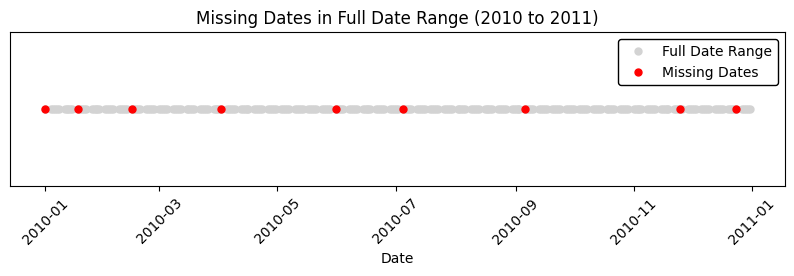

In [33]:
#plot the missing dates
full_data = Amazon.reindex(full_range)

#zoom in over one year
start_date = "2010-01-01"
end_date = "2011-01-01"
filtered_full_range = full_range[(full_range >= start_date) & (full_range <= end_date)]
filtered_missing_dates = MissingDays[(MissingDays >= start_date) & (MissingDays <= end_date)]

plt.figure(figsize=(10, 2))

# Plot all dates in the filtered range with gray dots (showing the full timeline for this period)
plt.plot(filtered_full_range, [1] * len(filtered_full_range), 'o', color='lightgray', markersize=5, label="Full Date Range")

# Overlay red dots only on the missing dates within the filtered range
plt.plot(filtered_missing_dates, [1] * len(filtered_missing_dates), 'ro', markersize=5, label="Missing Dates")

# Customize plot
plt.title("Missing Dates in Full Date Range (2010 to 2011)",color='black')
plt.xlabel("Date",color='black')
plt.yticks([])  # Hide y-axis labels for clarity
plt.xticks(rotation=45,color='black')
plt.legend(facecolor='white', edgecolor='black', framealpha=1, fontsize=10)

#Saving the plot in pdf format
plt.savefig('Latex/Img/MissingDates(2010_to_2011).pdf', format='pdf', bbox_inches='tight')

plt.show()


In [34]:
# extract the closing prices of the Amazon stok (as in lecture)
Pt_d_all = Amazon["Adj Close"]
Pt_d_all.name = 'Pt.d'
# mutate the Index into a DatetimeIndex
Pt_d_all.index = pd.to_datetime(Pt_d_all.index)
Pt_d_all.head()

Ticker,AMZN
Date,
1999-01-21 00:00:00+00:00,2.650000
1999-01-22 00:00:00+00:00,3.075000
1999-01-25 00:00:00+00:00,2.809375
1999-01-26 00:00:00+00:00,2.877344
1999-01-27 00:00:00+00:00,3.140625


Compute log price

In [35]:
pt_d_all = np.log(Pt_d_all)
pt_d_all.name = 'pt.d'
pt_d_all.head()

Ticker,AMZN
Date,
1999-01-21 00:00:00+00:00,0.974560
1999-01-22 00:00:00+00:00,1.123305
1999-01-25 00:00:00+00:00,1.032962
1999-01-26 00:00:00+00:00,1.056868
1999-01-27 00:00:00+00:00,1.144422


Compute weekly monthly and yearly

In [36]:
pt_w_all = pt_d_all.resample('W').last()
pt_m_all = pt_d_all.resample('M').last()
pt_y_all = pt_d_all.resample('Y').last()
# and rename them:
pt_w_all.name = 'pt.w.all'
pt_m_all.name = 'pt.m.all'
pt_y_all.name = 'pt.y.all'

#idem for simply prices
Pt_w_all = Pt_d_all.resample('W').last()
Pt_m_all = Pt_d_all.resample('M').last()
Pt_y_all = Pt_d_all.resample('Y').last()
# and rename them:
Pt_w_all.name = 'Pt_w_all'
Pt_m_all.name = 'Pt_m_all'
Pt_y_all.name = 'Pt_y_all'


C:\Users\33688\AppData\Local\Temp\ipykernel_17856\817676607.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pt_m_all = pt_d_all.resample('M').last()
C:\Users\33688\AppData\Local\Temp\ipykernel_17856\817676607.py:3: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  pt_y_all = pt_d_all.resample('Y').last()
C:\Users\33688\AppData\Local\Temp\ipykernel_17856\817676607.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  Pt_m_all = Pt_d_all.resample('M').last()
C:\Users\33688\AppData\Local\Temp\ipykernel_17856\817676607.py:12: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  Pt_y_all = Pt_d_all.resample('Y').last()


Plot the simple prices

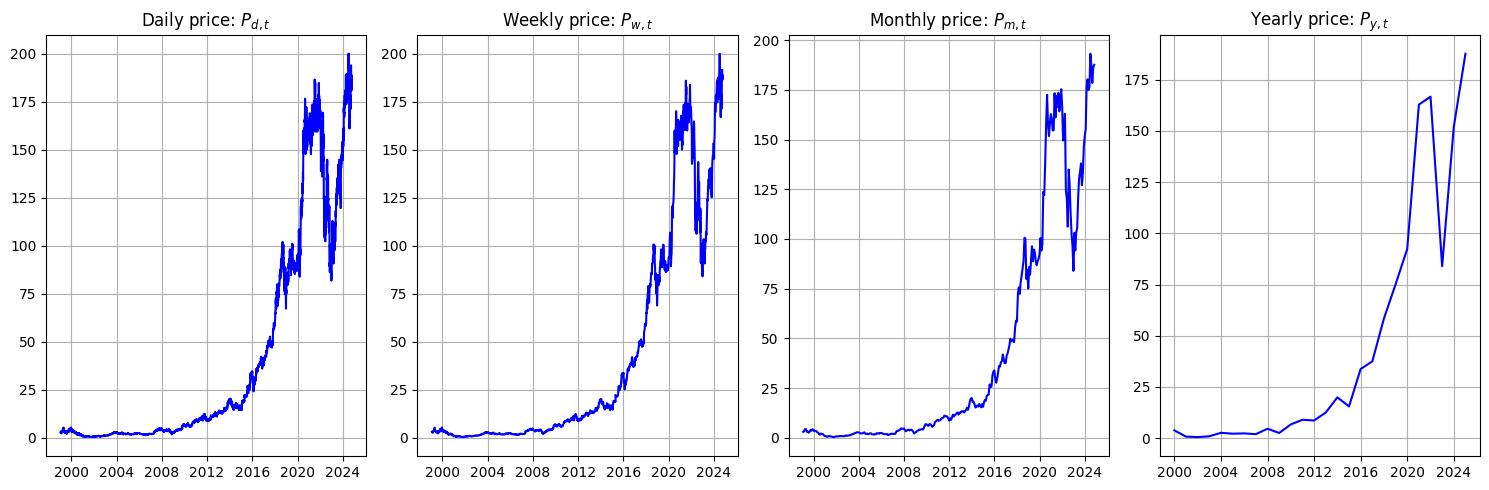

In [37]:
# set the 1x4 windows layout
fig, axs = plt.subplots(1, 4, figsize=(15, 5))
# Daily Price
axs[0].plot(Pt_d_all.index, Pt_d_all, color='blue')
axs[0].set_title('Daily price: $P_{d,t}$')
axs[0].grid(True)
# Weekly price
axs[1].plot(Pt_w_all.index, Pt_w_all, color='blue')
axs[1].set_title('Weekly price: $P_{w,t}$')
axs[1].grid(True)
# Monthly price
axs[2].plot(Pt_m_all.index, Pt_m_all, color='blue')
axs[2].set_title('Monthly price: $P_{m,t}$')
axs[2].grid(True)
#Yearly price
axs[3].plot(Pt_y_all.index, Pt_y_all, color='blue')
axs[3].set_title('Yearly price: $P_{y,t}$')
axs[3].grid(True)

# Manage margings and plot
plt.tight_layout()
plt.savefig('Latex/Img/prices_time.pdf', format='pdf', bbox_inches='tight')
plt.show()

Adding python code to the latex document in the appendix part

In [38]:
#Test for incorporating python code into the appendix section in the latex document
code_content = r"""
\section{Appendix: Python Code}
Below is the Python code used in this analysis.

\begin{lstlisting}[language=Python, caption=Python Code for Analysis]
# Python code example
import numpy as np
import pandas as pd

def analyze_data(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    return mean, std_dev

data = [1, 2, 3, 4, 5]
mean, std_dev = analyze_data(data)
print(f"Mean: {mean}, Standard Deviation: {std_dev}")
\end{lstlisting}
"""

# Write to the 'code_appendix.tex' file
with open("Latex/code_appendix.tex", "w") as file:
    file.write(code_content)

# *Calculating returns*

In [39]:
#calculating return

#log returns VS simple returns
Rt_d_all_temp = Pt_d_all.pct_change()
rt_d_all_temp = pt_d_all.diff()
rt_d_all_temp, Rt_d_all_temp

(Ticker                         AMZN
 Date                               
 1999-01-21 00:00:00+00:00       NaN
 1999-01-22 00:00:00+00:00  0.148745
 1999-01-25 00:00:00+00:00 -0.090343
 1999-01-26 00:00:00+00:00  0.023906
 1999-01-27 00:00:00+00:00  0.087554
 ...                             ...
 2024-10-09 00:00:00+00:00  0.013319
 2024-10-10 00:00:00+00:00  0.007961
 2024-10-11 00:00:00+00:00  0.011559
 2024-10-14 00:00:00+00:00 -0.006802
 2024-10-15 00:00:00+00:00  0.000800
 
 [6476 rows x 1 columns],
 Ticker                         AMZN
 Date                               
 1999-01-21 00:00:00+00:00       NaN
 1999-01-22 00:00:00+00:00  0.160377
 1999-01-25 00:00:00+00:00 -0.086382
 1999-01-26 00:00:00+00:00  0.024194
 1999-01-27 00:00:00+00:00  0.091501
 ...                             ...
 2024-10-09 00:00:00+00:00  0.013408
 2024-10-10 00:00:00+00:00  0.007993
 2024-10-11 00:00:00+00:00  0.011626
 2024-10-14 00:00:00+00:00 -0.006779
 2024-10-15 00:00:00+00:00  0.000800
 
 [6476 r

Compute daily, weekly, and monthly

In [40]:
rt_d_all = pt_d_all.diff().dropna() #dropna remove the first NaN
rt_w_all = pt_w_all.diff().dropna()  
rt_m_all = pt_m_all.diff().dropna()     
rt_y_all = pt_y_all.diff().dropna()     

Rt_d_all = Pt_d_all.pct_change().dropna() #dropna remove the first NaN
Rt_w_all = Pt_w_all.pct_change().dropna()  
Rt_m_all = Pt_m_all.pct_change().dropna()     
Rt_y_all = Pt_y_all.pct_change().dropna()   

# and rename them: 
rt_d_all.name = 'rt_d_all'
rt_w_all.name = 'rt_w_all'
rt_m_all.name = 'rt_m_all'
rt_y_all.name = 'rt_y_all'

Rt_d_all.name = 'Rt_d_all'
Rt_w_all.name = 'Rt_w_all'
Rt_m_all.name = 'Rt_m_all'
Rt_y_all.name = 'Rt_y_all'

rt_d_all.head()
Rt_d_all.head()

Ticker,AMZN
Date,
1999-01-22 00:00:00+00:00,0.160377
1999-01-25 00:00:00+00:00,-0.086382
1999-01-26 00:00:00+00:00,0.024194
1999-01-27 00:00:00+00:00,0.091501
1999-01-28 00:00:00+00:00,-0.021891


The first returns are correctly computed, we have to be careful to the dropna

Let's plot returns

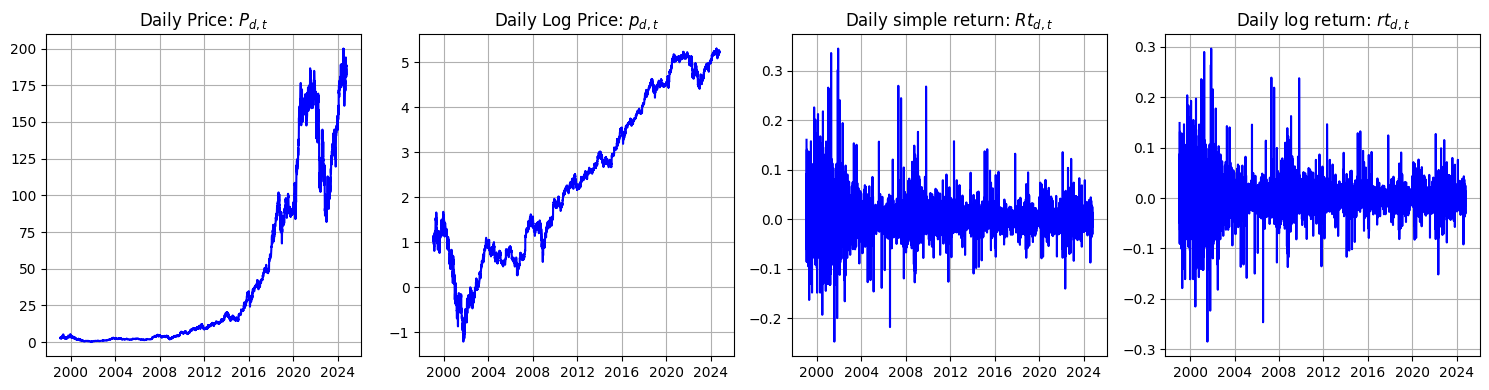

In [41]:
# set the 1x3 windows layout
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
# Daily Price
axs[0].plot(Pt_d_all.index, Pt_d_all, color='blue')
axs[0].set_title('Daily Price: $P_{d,t}$')
axs[0].grid(True)
# Daily log price
axs[1].plot(pt_d_all.index, pt_d_all, color='blue')
axs[1].set_title('Daily Log Price: $p_{d,t}$')
axs[1].grid(True)
# Daily simple returns
axs[2].plot(Rt_d_all.index, Rt_d_all, color='blue')
axs[2].set_title('Daily simple return: $Rt_{d,t}$')
axs[2].grid(True)
# Daily log returns
axs[3].plot(rt_d_all.index, rt_d_all, color='blue')
axs[3].set_title('Daily log return: $rt_{d,t}$')
axs[3].grid(True)


plt.tight_layout()
plt.savefig('Latex/Img/log_returns.pdf', format='pdf', bbox_inches='tight')
plt.show()

Squared returns

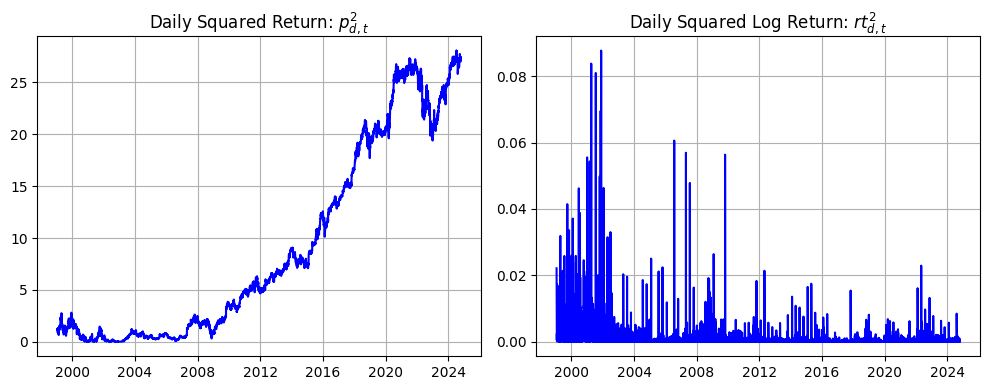

In [42]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Daily squared log price
axs[0].plot(pt_d_all.index, pt_d_all**2, color='blue')
axs[0].set_title('Daily Squared Return: $p_{d,t}^2$')
axs[0].grid(True)
# Daily squared log returns
axs[1].plot(rt_d_all.index, rt_d_all**2, color='blue')
axs[1].set_title('Daily Squared Log Return: $rt_{d,t}^2$')
axs[1].grid(True)

plt.tight_layout()
plt.savefig('Latex/Img/squared_log_returns.pdf', format='pdf', bbox_inches='tight')
plt.show()

# *Scatterplot of $p_{t} - p_{t-1}$*

First define the function for plotting a scatterplot

In [43]:
def lag1_scatterplot(data, x_label, y_label, title):
    plt.scatter(data.shift(), data, color='blue', s=30) #data.shift is just pt-1 (if t=0 what happend ?)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot([min(data), max(data)], [min(data), max(data)], linestyle='dashed', linewidth=2, color='red')
#    plt.savefig('Latex/Img/Laggedlog(p_t-1).pdf', format='pdf', bbox_inches='tight')

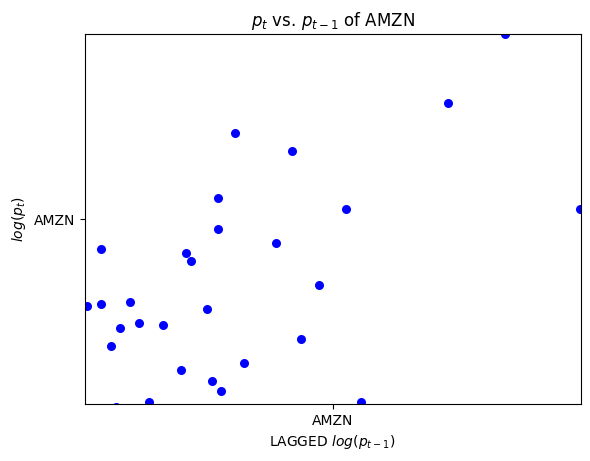

In [44]:
lag1_scatterplot(pt_d_all,"LAGGED $log(p_{t-1})$","$log(p_t)$","$p_t$ vs. $p_{t-1}$ of AMZN")

# Autocorrelation

In [45]:
autocorrelate=pt_d_all.shift().corrwith(pt_d_all, method='pearson')
print(round(autocorrelate,4))

Ticker
AMZN    0.9998
dtype: float64


In [46]:
"""
autocorrelate = pt_d_all.shift(1).corrwith(pt_d_all, method='pearson')
print(autocorrelate.round(4))
"""

"\nautocorrelate = pt_d_all.shift(1).corrwith(pt_d_all, method='pearson')\nprint(autocorrelate.round(4))\n"

### 4.1/ Prices are non-stationary
###### 1. Profile of Log Prices with Time
###### 2. Pt VS P(t-1)
###### 3. Autocorrelation of Daily Prices

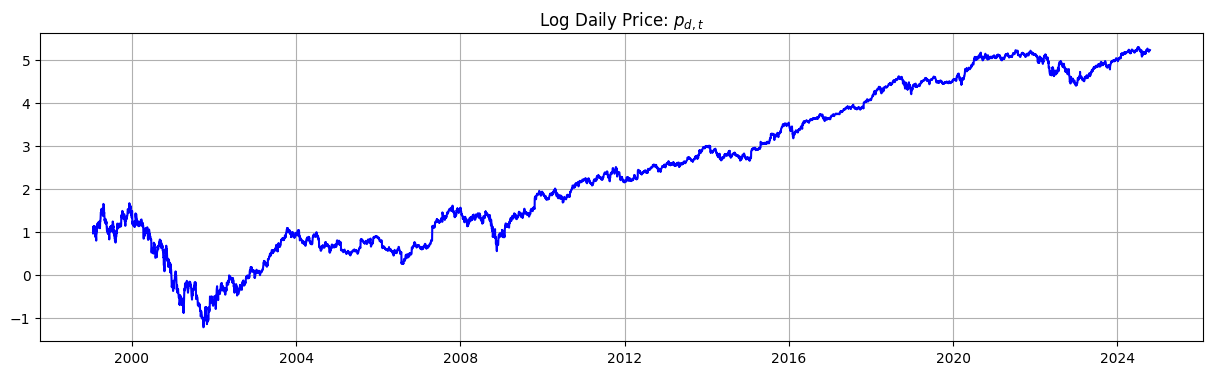

In [47]:
import matplotlib.pyplot as plt

# Set the layout for 1x3 subplots (though you may not need all subplots)
fig, axs = plt.subplots(1, 1, figsize=(15, 4))

# Plot Daily Price
axs.plot(pt_d_all.index, pt_d_all, color='blue')
axs.set_title('Log Daily Price: $p_{d,t}$')
axs.grid(True)

# Show the plot
plt.show()

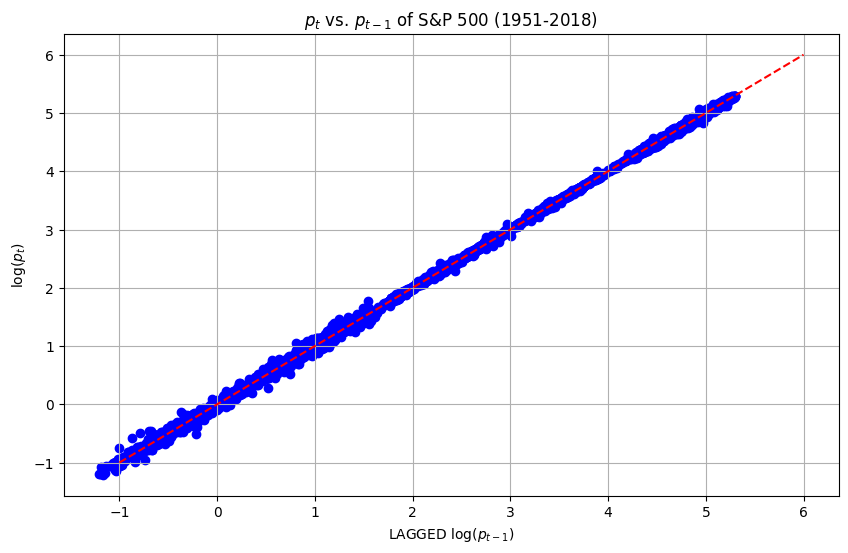

In [48]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Estrai i log-prezzi giornalieri
log_price_daily = pt_d_all

# Calcola il log-prezzo al giorno precedente
log_price_previous = log_price_daily.shift(1)

# Creazione dello scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(log_price_previous, log_price_daily, color='blue')
plt.plot([-1, 6], [-1, 6], color='red', linestyle='--')
plt.title('$p_t$ vs. $p_{t-1}$ of S&P 500 (1951-2018)')
plt.xlabel(r'LAGGED $\log(p_{t-1})$')
plt.ylabel(r'$\log(p_t)$')
plt.grid(True)

# Salva il grafico in formato png
plt.savefig('Latex/Img/log(pt) vs log(pt-1).pdf', format='pdf', bbox_inches='tight')

plt.show()

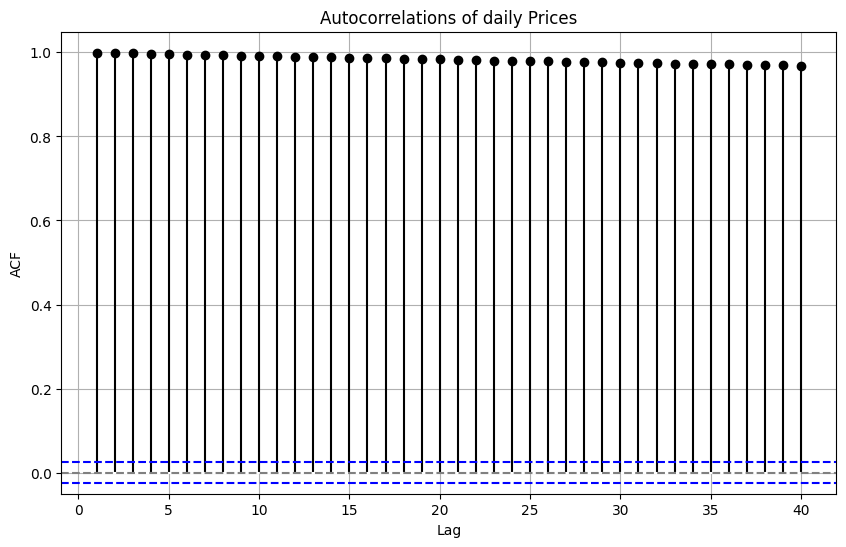

In [49]:
from statsmodels.tsa.stattools import acf

# Calculate empirical autocorrelation
lags = 40
acf_values = acf(Pt_d_all, nlags=lags)

# Calculate Bartlett intervals
Bart_Int = 1.96 / np.sqrt(len(Pt_d_all))

# Create the autocorrelation plot with Bartlett intervals
plt.figure(figsize=(10, 6))
plt.stem(np.arange(1, lags + 1), acf_values[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axhline(y=Bart_Int, color='blue', linestyle='--')
plt.axhline(y=-Bart_Int, color='blue', linestyle='--')
plt.title('Autocorrelations of daily Prices')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
#plt.savefig('Latex/Autocorrel_daily.pdf', format='pdf', bbox_inches='tight')
plt.show()

### 4.2/ Log Returns are Stationary
###### 1. Profile of Log Returns with Time
###### 2. Rt VS R(t-1)
###### 3. Autocorrelation of Daily Returns

C:\Users\33688\AppData\Local\Temp\ipykernel_17856\3992436510.py:18: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'YE-DEC' instead.
  date_labels = pd.date_range(start='1999-12-31', end='2023-12-31', freq='A-DEC')


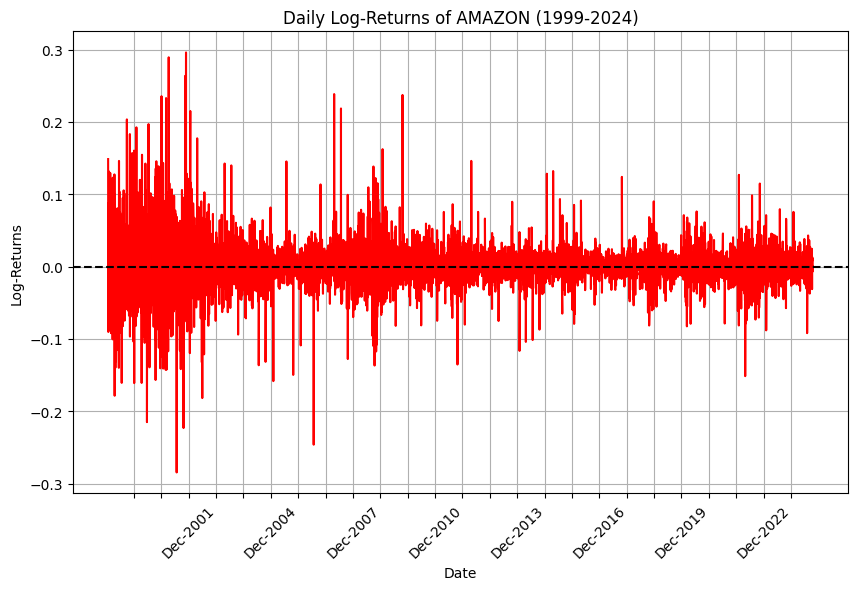

In [50]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np

# Calculate daily log returns
log_returns_daily = rt_d_all

# Create the plot of daily log returns with a black horizontal line
plt.figure(figsize=(10, 6))
plt.plot(log_returns_daily.index, log_returns_daily, color='red')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Daily Log-Returns of AMAZON (1999-2024)')
plt.xlabel('Date')
plt.ylabel('Log-Returns')
plt.grid(True)

# Customizing x-axis labels for December 31 of each year
date_labels = pd.date_range(start='1999-12-31', end='2023-12-31', freq='A-DEC')
# Show 1 tick every 3 years
formatted_labels = [f'Dec-{date.year}' if date.year % 3 == 0 else '' for date in date_labels]
# Add labels and rotate them 
plt.xticks(date_labels, formatted_labels, rotation=45)

# Save the plot in png format
plt.savefig('Latex/Img/Daily Log Returns.pdf', format='pdf', bbox_inches='tight')

plt.show()

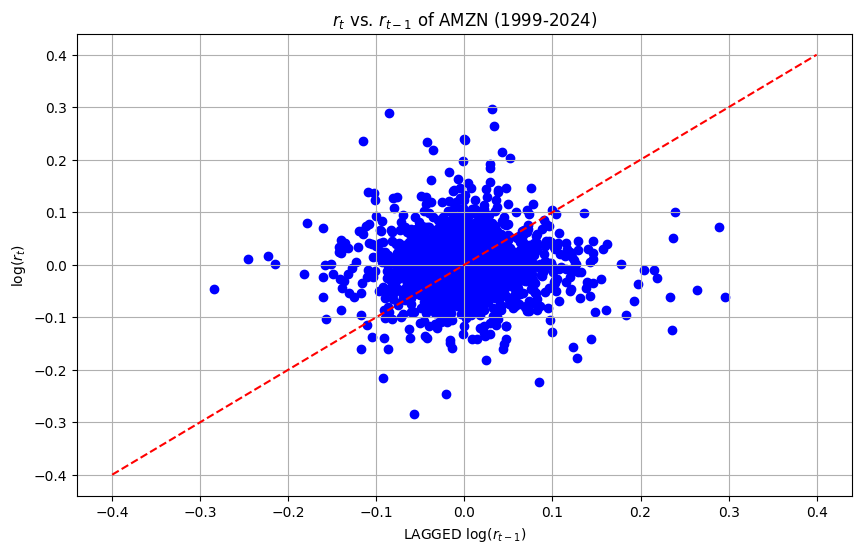

In [51]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np


# Get the Daily Log Returns
log_return_daily = rt_d_all

# Calculation of the Lagged log returns
log_return_previous = log_return_daily.shift(1)

# Creation of the Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(log_return_previous, log_return_daily, color='blue')
plt.plot([-0.4, 0.4], [-0.4, 0.4], color='red', linestyle='--')
plt.title('$r_t$ vs. $r_{t-1}$ of AMZN (1999-2024)')
plt.xlabel(r'LAGGED $\log(r_{t-1})$')
plt.ylabel(r'$\log(r_t)$')
plt.grid(True)

# Saving the Image
plt.savefig('Latex/Img/LogReturns_vs_LaggedLogReturns.pdf', format='png', bbox_inches='tight')

plt.show()

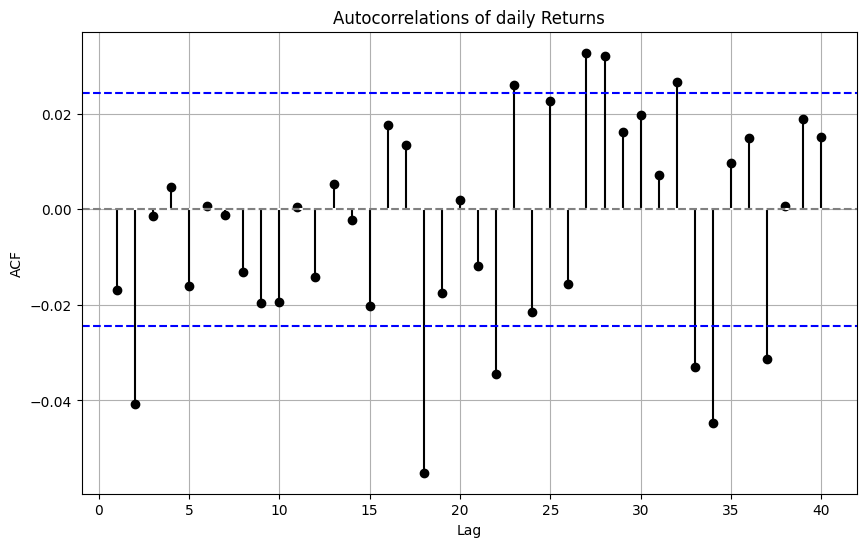

In [52]:
from statsmodels.tsa.stattools import acf

# Calculate empirical autocorrelation
lags = 40
acf_values = acf(Rt_d_all, nlags=lags)

# Calculate Bartlett intervals
Bart_Int = 1.96 / np.sqrt(len(Rt_d_all))

# Create the autocorrelation plot with Bartlett intervals
plt.figure(figsize=(10, 6))
plt.stem(np.arange(1, lags + 1), acf_values[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axhline(y=Bart_Int, color='blue', linestyle='--')
plt.axhline(y=-Bart_Int, color='blue', linestyle='--')
plt.title('Autocorrelations of daily Returns')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
#plt.savefig('Latex/Autocorrel_Returns_daily.pdf', format='pdf', bbox_inches='tight')
plt.show()

### 4.3/ Are Log Returns Asymmetric ?
###### 1. Rolling Mean
###### 2. Rolling Skewness
###### 3. Current Skewness and Interpretation

c:\Users\33688\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
C:\Users\33688\AppData\Local\Temp\ipykernel_17856\2086121117.py:26: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  roll_mom_manual[i, 1] = np.std(y, ddof=1)
C:\Users\33688\AppData\Local\Temp\ipykernel_17856\2086121117.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  roll_mom_manual[i, 2] = skew(y)
C:\Users\33688\AppData\Local\Temp\ipyke

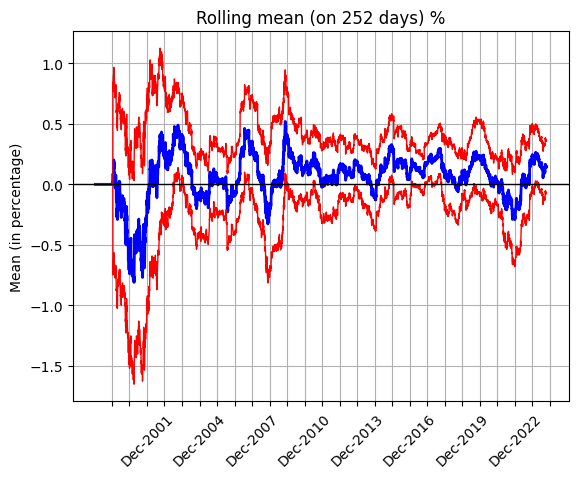

In [53]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
import pandas as pd 

# Compute daily log-returns
log_returns_daily = rt_d_all

# set the rolling window equal to 252 days
window_length = 252
T = log_returns_daily.shape[0]

# Create an empty matrix to store data
roll_mom_manual = np.zeros((T, 5))

# Run a for loop to fill the matrix with moments
for i in range(window_length, T):
    est_window = np.arange(i - window_length + 1, i + 1)
    
    # Use .iloc to select rows by integer positions, not labels
    y = log_returns_daily.iloc[est_window]
    
    # Compute the moments for each
    roll_mom_manual[i, 0] = np.mean(y)
    roll_mom_manual[i, 1] = np.std(y, ddof=1)
    roll_mom_manual[i, 2] = skew(y)
    roll_mom_manual[i, 3] = kurtosis(y)
    roll_mom_manual[i, 4] = np.mean((y - np.mean(y))**4)


# Plot results of manually computed rolling mean
mean_plot_man = roll_mom_manual[:, 0]
mean_plot_man_ub = mean_plot_man + 1.96 * roll_mom_manual[:, 1] / np.sqrt(window_length)
mean_plot_man_lb = mean_plot_man - 1.96 * roll_mom_manual[:, 1] / np.sqrt(window_length)

data2plot_na = np.column_stack((mean_plot_man, mean_plot_man_lb, mean_plot_man_ub))

data_index = log_returns_daily.index

data2plot_na = pd.DataFrame({'Mean': mean_plot_man, 'LowerBound': mean_plot_man_lb, 'UpperBound': mean_plot_man_ub},
                               index=data_index)

# Select only rows without missing values
data2plot = data2plot_na.dropna()
# retrieve the data index
data2plot

# Customizing x-axis labels for December 31 of each year
date_labels = pd.date_range(start='1999-12-31', end='2024-12-31', freq='A-DEC')
# Show 1 tick every 3 years
formatted_labels = [f'Dec-{date.year}' if date.year % 3 == 0 else '' for date in date_labels]
# Add labels and rotate them 
plt.xticks(date_labels, formatted_labels, rotation=45)


# Plot the data
plt.plot(data2plot.index, data2plot["Mean"] * 100, color='blue', linestyle='-', linewidth=2)
plt.plot(data2plot.index, data2plot["LowerBound"] * 100, color='red', linestyle='-', linewidth=1)
plt.plot(data2plot.index, data2plot["UpperBound"] * 100, color='red', linestyle='-', linewidth=1)
plt.grid(True)
plt.xlabel('')
plt.ylabel('Mean (in percentage)')
plt.title('Rolling mean (on 252 days) %')
plt.axhline(0, linestyle='-', color='black', linewidth=1)  # Add a zero line


plt.savefig('Latex/Img/AMZN_MEAN_rolling_1999_2024.pdf', format='pdf', bbox_inches='tight')

plt.show()

C:\Users\33688\AppData\Local\Temp\ipykernel_17856\1963832247.py:19: FutureWarning: 'A-DEC' is deprecated and will be removed in a future version, please use 'YE-DEC' instead.
  date_labels = pd.date_range(start='1999-12-31', end='2024-12-31', freq='A-DEC')


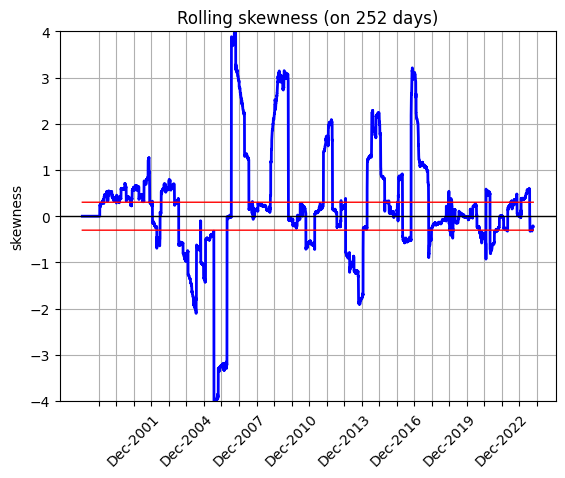

In [54]:
# Skewess
skew_plot = roll_mom_manual[:,2]
skew_plot_ub = np.full(skew_plot.shape[0],+1.96*np.sqrt(6)/np.sqrt(window_length))
skew_plot_lb = np.full(skew_plot.shape[0],-1.96*np.sqrt(6)/np.sqrt(window_length))

data2plot_na = np.column_stack((skew_plot, skew_plot_lb, skew_plot_ub))

data_index = log_returns_daily.index

data2plot_na = pd.DataFrame({'Skewness': skew_plot, 'LowerBound': skew_plot_lb, 'UpperBound': skew_plot_ub},
                               index=data_index)

# Select only rows without missing values
data2plot = data2plot_na.dropna()
# retrieve the data index
data2plot

# Customizing x-axis labels for December 31 of each year
date_labels = pd.date_range(start='1999-12-31', end='2024-12-31', freq='A-DEC')
# Show 1 tick every 3 years
formatted_labels = [f'Dec-{date.year}' if date.year % 3 == 0 else '' for date in date_labels]
# Add labels and rotate them 
plt.xticks(date_labels, formatted_labels, rotation=45)

# Plot the data
plt.plot(data2plot.index, data2plot["Skewness"], color='blue', linestyle='-', linewidth=2)
plt.plot(data2plot.index, data2plot["LowerBound"], color='red', linestyle='-', linewidth=1)
plt.plot(data2plot.index, data2plot["UpperBound"], color='red', linestyle='-', linewidth=1)
plt.ylim(-4,4)
plt.grid(True)
plt.xlabel('')
plt.ylabel('skewness')
plt.title('Rolling skewness (on 252 days)')
plt.axhline(0, linestyle='-', color='black', linewidth=1)  # Add a zero line


plt.savefig('Latex/Img/AMZN_skew_rolling_1999_2024.pdf', format='pdf', bbox_inches='tight')

plt.show()


In [55]:
skewness = skew(rt_d_all)
print("skewness is :", skewness)

skewness is : [0.43048369]


### 4.4/ Heavy Tailed Distribution for the Daily Log Returns ?
###### 1. Comparison of the Normal Distribution vs our actual Values
###### 2. Excess Kurtosis of our data
###### 3. Interpretation

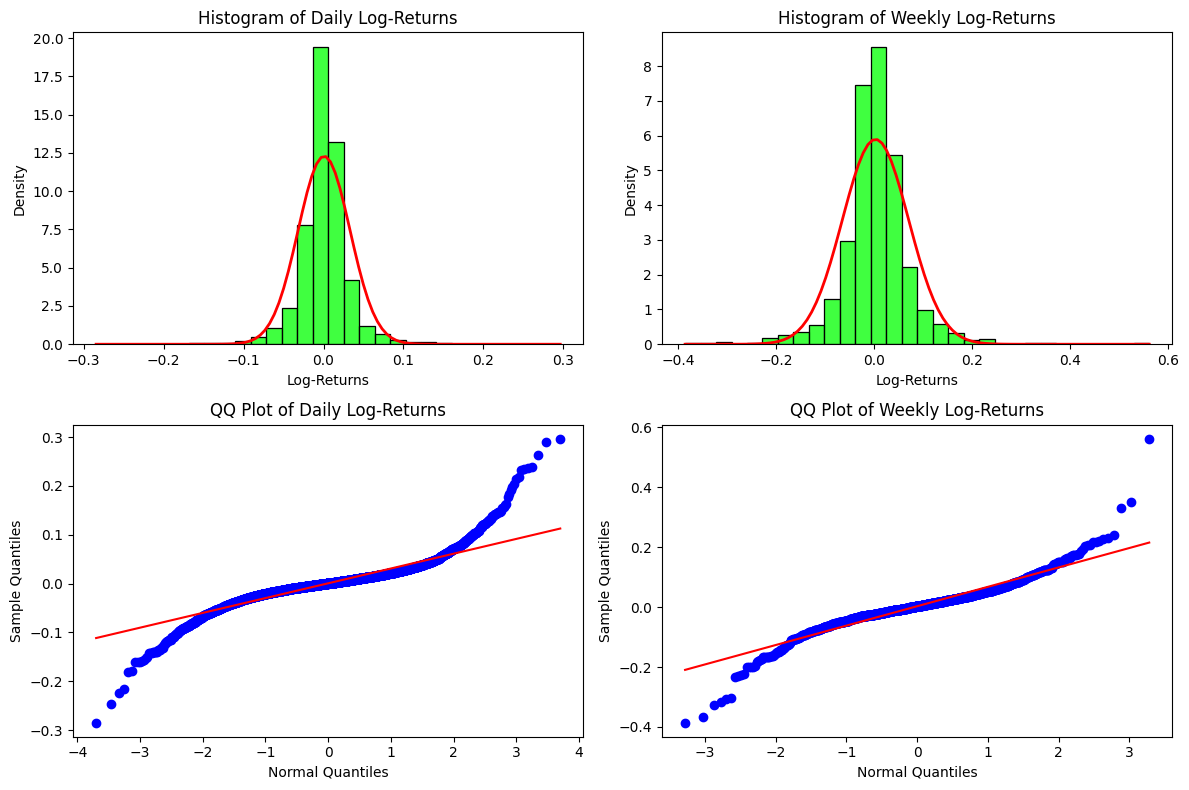

In [56]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Extract daily log-returns
log_price_daily = pt_d_all  # Ensure this is a pandas DataFrame or Series
log_returns_daily = rt_d_all  # Ensure this is a pandas DataFrame or Series

# If log_returns_daily is a DataFrame, convert it to a 1D array (assuming 'column_name' is the name of the column)
log_returns_daily = log_returns_daily.values.flatten()  # Ensure it's 1D array

# Calculate monthly log-returns
log_price_weekly = pt_w_all  # Ensure this is a pandas DataFrame or Series
log_returns_weekly = rt_w_all  # Ensure this is a pandas DataFrame or Series

# If log_returns_monthly is a DataFrame, convert it to a 1D array (assuming 'column_name' is the name of the column)
log_returns_weekly = log_returns_weekly.values.flatten()  # Ensure it's 1D array

# Create the figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histogram of daily log-returns
sns.histplot(log_returns_daily, bins=30, color='lime', edgecolor='black', kde_kws={'color': 'red'}, ax=axs[0, 0], stat='density')
axs[0, 0].plot(np.linspace(log_returns_daily.min(), log_returns_daily.max(), 100),
               stats.norm.pdf(np.linspace(log_returns_daily.min(), log_returns_daily.max(), 100),
                              log_returns_daily.mean(), log_returns_daily.std()), color='red', linewidth=2)
axs[0, 0].set_title('Histogram of Daily Log-Returns')
axs[0, 0].set_xlabel('Log-Returns')
axs[0, 0].set_ylabel('Density')

# Plot histogram of monthly log-returns
sns.histplot(log_returns_weekly, bins=30, color='lime', edgecolor='black', kde_kws={'color': 'red'}, ax=axs[0, 1], stat='density')
axs[0, 1].plot(np.linspace(log_returns_weekly.min(), log_returns_weekly.max(), 100),
               stats.norm.pdf(np.linspace(log_returns_weekly.min(), log_returns_weekly.max(), 100),
                              log_returns_weekly.mean(), log_returns_weekly.std()), color='red', linewidth=2)
axs[0, 1].set_title('Histogram of Weekly Log-Returns')
axs[0, 1].set_xlabel('Log-Returns')
axs[0, 1].set_ylabel('Density')

# QQ plot of daily log-returns
stats.probplot(log_returns_daily, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('QQ Plot of Daily Log-Returns')
axs[1, 0].set_xlabel('Normal Quantiles')
axs[1, 0].set_ylabel('Sample Quantiles')

# QQ plot of monthly log-returns
stats.probplot(log_returns_weekly, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('QQ Plot of Weekly Log-Returns')
axs[1, 1].set_xlabel('Normal Quantiles')
axs[1, 1].set_ylabel('Sample Quantiles')

# Adjust spacing between plots
plt.tight_layout()

# Save the plot in pdf format
plt.savefig('Latex/Img/QQplot_daily_weekly_AMZN.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


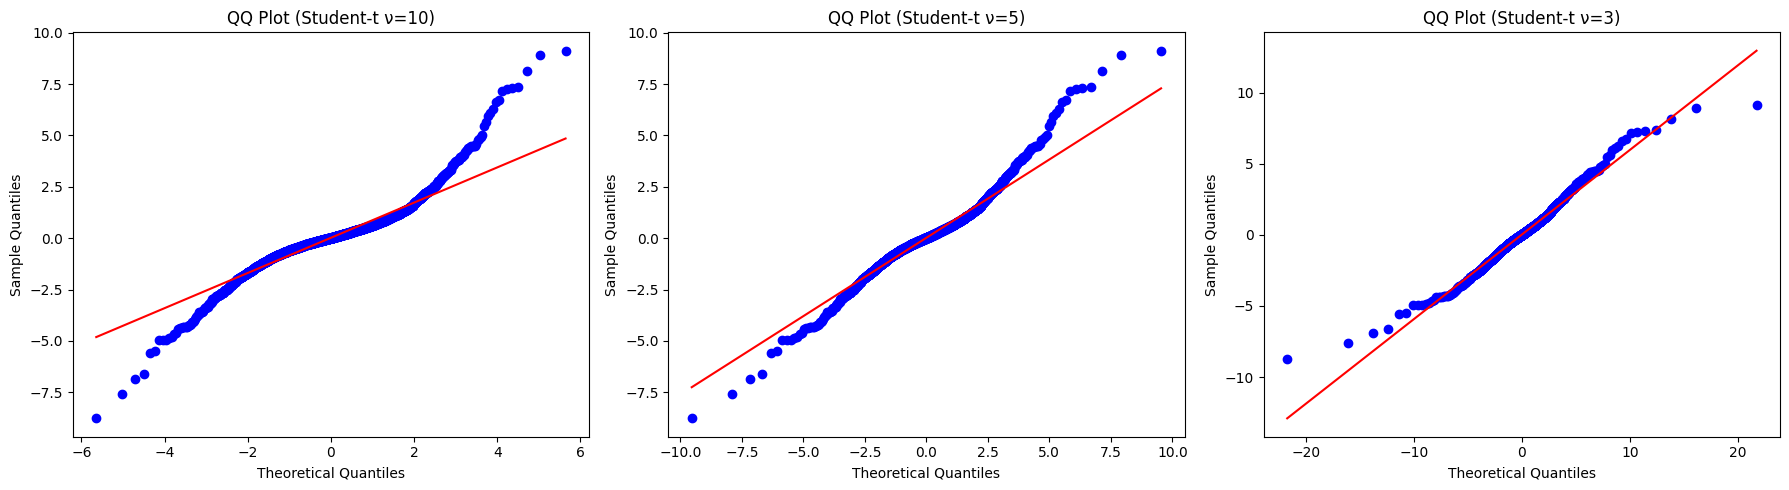

In [57]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Extract daily log-returns
log_returns_daily = rt_d_all.values.flatten()

# Create three side-by-side QQ plots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Normalize the data to have zero mean and unit variance
log_returns_daily_normalized = log_returns_daily / np.std(log_returns_daily)

# QQ plot against Student-t distribution with ν = 10
stats.probplot(log_returns_daily_normalized, dist=stats.t, sparams=(10,), plot=axs[0])
axs[0].set_title('QQ Plot (Student-t ν=10)')
axs[0].set_xlabel('Theoretical Quantiles')
axs[0].set_ylabel('Sample Quantiles')

# QQ plot against Student-t distribution with ν = 5
stats.probplot(log_returns_daily_normalized, dist=stats.t, sparams=(5,), plot=axs[1])
axs[1].set_title('QQ Plot (Student-t ν=5)')
axs[1].set_xlabel('Theoretical Quantiles')
axs[1].set_ylabel('Sample Quantiles')

# QQ plot against Student-t distribution with ν = 3
stats.probplot(log_returns_daily_normalized, dist=stats.t, sparams=(3,), plot=axs[2])
axs[2].set_title('QQ Plot (Student-t ν=3)')
axs[2].set_xlabel('Theoretical Quantiles')
axs[2].set_ylabel('Sample Quantiles')

# Adjust spacing between QQ plots
plt.tight_layout()

# Save the plot in png format
plt.savefig('Latex/Img/qqplt_tstudents_AMZNdaily.pdf', format='pdf', bbox_inches='tight')

plt.show()

##### Kurtosis of the sample

In [58]:
from scipy.stats import kurtosis
exc_kurt = kurtosis(Rt_d_all) - 3
print("Excess Kurtosis = ", exc_kurt)

Excess Kurtosis =  [10.51221658]


##### The sample of data defined by the simple returns of AMZN stock is HEAVY TAILED

### 4.5/High Frequecy non-Gaussianity
###### 1. Overall Shapes
###### 2. Lilliefors Test

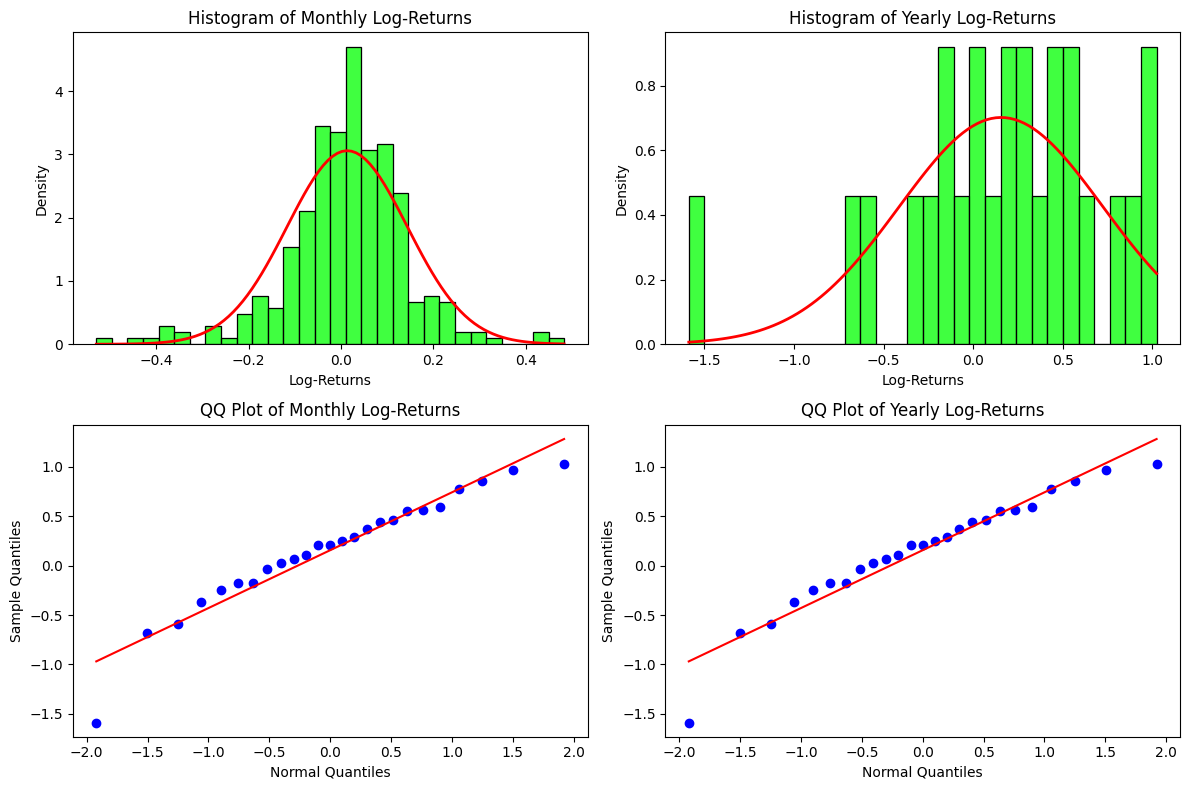

In [59]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Extract daily log-returns
log_price_mothly = pt_m_all  # Ensure this is a pandas DataFrame or Series
log_returns_monthly = rt_m_all  # Ensure this is a pandas DataFrame or Series

# If log_returns_daily is a DataFrame, convert it to a 1D array (assuming 'column_name' is the name of the column)
log_returns_monthly = log_returns_monthly.values.flatten()  # Ensure it's 1D array

# Calculate monthly log-returns
log_price_yearly = pt_y_all  # Ensure this is a pandas DataFrame or Series
log_returns_yearly = rt_y_all  # Ensure this is a pandas DataFrame or Series

# If log_returns_monthly is a DataFrame, convert it to a 1D array (assuming 'column_name' is the name of the column)
log_returns_yearly = log_returns_yearly.values.flatten()  # Ensure it's 1D array

# Create the figure with four subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot histogram of daily log-returns
sns.histplot(log_returns_monthly, bins=30, color='lime', edgecolor='black', kde_kws={'color': 'red'}, ax=axs[0, 0], stat='density')
axs[0, 0].plot(np.linspace(log_returns_monthly.min(), log_returns_monthly.max(), 100),
               stats.norm.pdf(np.linspace(log_returns_monthly.min(), log_returns_monthly.max(), 100),
                              log_returns_monthly.mean(), log_returns_monthly.std()), color='red', linewidth=2)
axs[0, 0].set_title('Histogram of Monthly Log-Returns')
axs[0, 0].set_xlabel('Log-Returns')
axs[0, 0].set_ylabel('Density')

# Plot histogram of monthly log-returns
sns.histplot(log_returns_yearly, bins=30, color='lime', edgecolor='black', kde_kws={'color': 'red'}, ax=axs[0, 1], stat='density')
axs[0, 1].plot(np.linspace(log_returns_yearly.min(), log_returns_yearly.max(), 100),
               stats.norm.pdf(np.linspace(log_returns_yearly.min(), log_returns_yearly.max(), 100),
                              log_returns_yearly.mean(), log_returns_yearly.std()), color='red', linewidth=2)
axs[0, 1].set_title('Histogram of Yearly Log-Returns')
axs[0, 1].set_xlabel('Log-Returns')
axs[0, 1].set_ylabel('Density')

# QQ plot of daily log-returns
stats.probplot(log_returns_yearly, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title('QQ Plot of Monthly Log-Returns')
axs[1, 0].set_xlabel('Normal Quantiles')
axs[1, 0].set_ylabel('Sample Quantiles')

# QQ plot of monthly log-returns
stats.probplot(log_returns_yearly, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title('QQ Plot of Yearly Log-Returns')
axs[1, 1].set_xlabel('Normal Quantiles')
axs[1, 1].set_ylabel('Sample Quantiles')

# Adjust spacing between plots
plt.tight_layout()

# Save the plot in pdf format
plt.savefig('Latex/Img/QQplot_monthly_yearly_AMZN.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


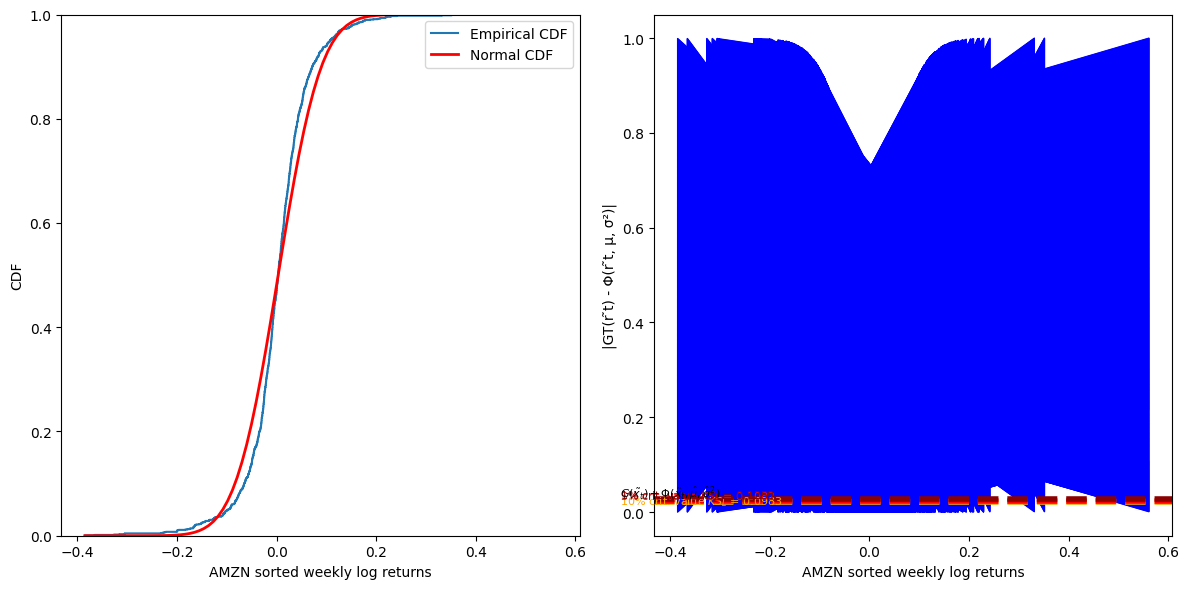

In [60]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

# Compute annual log-returns 
log_returns_weekly = rt_w_all

# Compute mean and std
mean_data = log_returns_weekly.mean()
sd_data = log_returns_weekly.std()
samp_size = len(log_returns_weekly)
seq_ind = np.arange(1, samp_size + 1, 1)
emp_cdf = seq_ind / samp_size
emp_cdf_2 = (seq_ind - 1) / samp_size
my_data_ordered = np.sort(log_returns_weekly)
theor_cdf = stats.norm.cdf(my_data_ordered, mean_data, sd_data)

# Set the layout
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Left panel: empirical and Normal cdf's
sns.ecdfplot(log_returns_weekly, ax=axs[0], label='Empirical CDF')
axs[0].plot(np.linspace(log_returns_weekly.min(), log_returns_weekly.max(), 100),
            stats.norm.cdf(np.linspace(log_returns_weekly.min(), log_returns_weekly.max(), 100),
                           mean_data, sd_data),
            color='red', linewidth=2, label='Normal CDF')
axs[0].set_xlabel('AMZN sorted weekly log returns')
axs[0].set_ylabel('CDF')
axs[0].set_title('')
axs[0].legend()

# Right panel: Lilliefors test
KS_L_stat1 = np.max(np.abs(emp_cdf - theor_cdf))
KS_L_stat2 = np.max(np.abs(emp_cdf_2 - theor_cdf))
KS_L_stat = max(KS_L_stat1, KS_L_stat2)
axs[1].plot(my_data_ordered, np.abs(emp_cdf_2 - theor_cdf), color='blue', linewidth=1)
axs[1].axhline(y=0.805/np.sqrt(samp_size), color='orange', linewidth=4, linestyle='--')
axs[1].axhline(y=0.886/np.sqrt(samp_size), color='red', linewidth=4, linestyle='--')
axs[1].axhline(y=1.031/np.sqrt(samp_size), color='darkred', linewidth=4, linestyle='--')
axs[1].text(-0.5, 0.805/np.sqrt(samp_size)-0.006, '10% crit. value $KS_L$ = 0.0983', fontsize=8, color='orange')
axs[1].text(-0.5, 0.886/np.sqrt(samp_size)+0.002, '5% crit. value $KS_L$ = 0.1082', fontsize=8, color='red')
axs[1].text(-0.5, 1.031/np.sqrt(samp_size)+0.002, '1% crit. value $KS_L$ = 0.1259', fontsize=8, color='darkred')
axs[1].text(-0.5, 0.032, '$ G(\\tilde{x}_t)-\\Phi(\\tilde{x}_t, \\hat{\\mu}, \\hat{\\sigma}^2)$', fontsize=8)
axs[1].set_xlabel('AMZN sorted weekly log returns')
axs[1].set_ylabel('|GT(r ̃t) - Φ(r ̃t, μ, σ²)|')
axs[1].set_title('')

# Set the space within plots
plt.tight_layout()

# Save the figure in png format
plt.savefig('Latex/Img/lillie_test_AMZNweekly.pdf', format='pdf', bbox_inches='tight')

plt.show()

### 4.6/ Returns are not autocorrelated
###### 1. Daily, Weekly and Monthly Autocorrelations

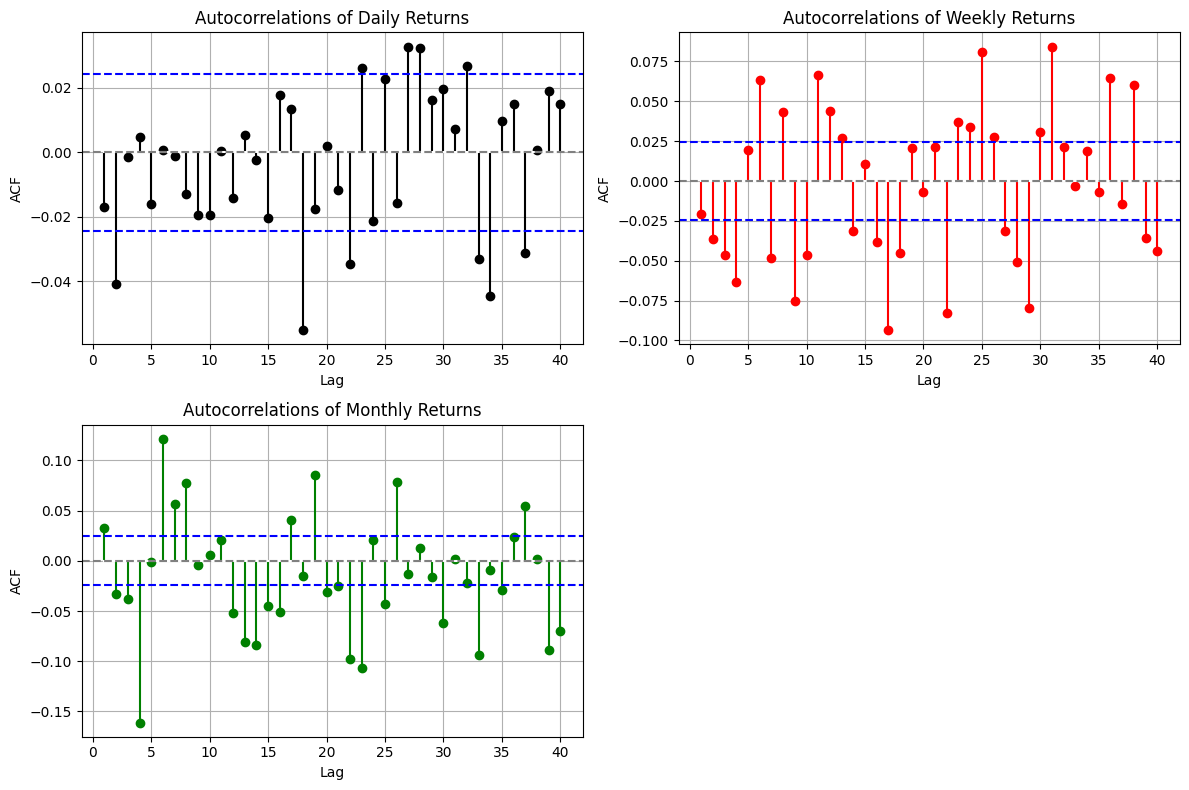

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf

# Calculate empirical autocorrelations for daily, weekly, monthly, and yearly returns
lags = 40

# Daily ACF
acf_daily_values = acf(Rt_d_all, nlags=lags)

# Weekly ACF
acf_weekly_values = acf(Rt_w_all, nlags=lags)

# Monthly ACF
acf_monthly_values = acf(Rt_m_all, nlags=lags)

# Calculate Bartlett intervals
Bart_Int = 1.96 / np.sqrt(len(Rt_d_all))

# Create the autocorrelation plot with Bartlett intervals for each time frame
plt.figure(figsize=(12, 8))

# Plot daily autocorrelations
plt.subplot(2, 2, 1)
plt.stem(np.arange(1, lags + 1), acf_daily_values[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axhline(y=Bart_Int, color='blue', linestyle='--')
plt.axhline(y=-Bart_Int, color='blue', linestyle='--')
plt.title('Autocorrelations of Daily Returns')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)

# Plot weekly autocorrelations
plt.subplot(2, 2, 2)
plt.stem(np.arange(1, lags + 1), acf_weekly_values[1:], linefmt='r-', markerfmt='ro', basefmt='w-')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axhline(y=Bart_Int, color='blue', linestyle='--')
plt.axhline(y=-Bart_Int, color='blue', linestyle='--')
plt.title('Autocorrelations of Weekly Returns')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)

# Plot monthly autocorrelations
plt.subplot(2, 2, 3)
plt.stem(np.arange(1, lags + 1), acf_monthly_values[1:], linefmt='g-', markerfmt='go', basefmt='w-')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axhline(y=Bart_Int, color='blue', linestyle='--')
plt.axhline(y=-Bart_Int, color='blue', linestyle='--')
plt.title('Autocorrelations of Monthly Returns')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [62]:
autocorrelate = pt_d_all.shift(1).corrwith(pt_d_all, method='pearson')
print(autocorrelate.round(4))

Ticker
AMZN    0.9998
dtype: float64


### 4.7/ Returns feature volatility clustering ⇔ long run range dependence of squared returns

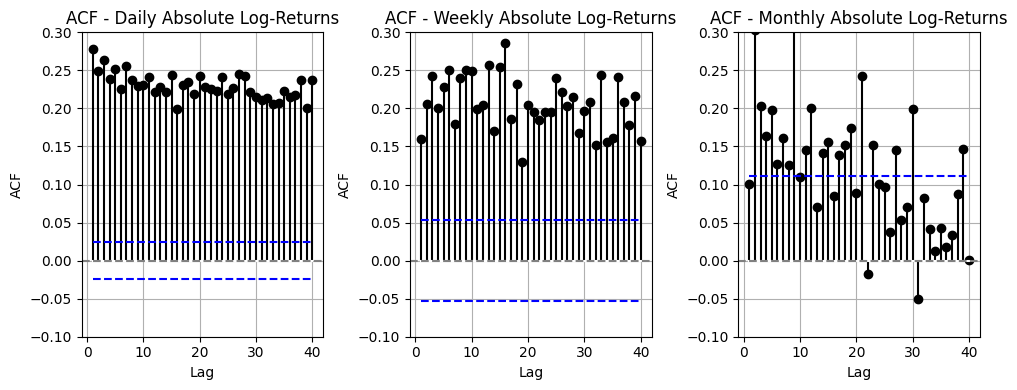

In [68]:
# Extract daily log-returns
log_returns_daily = rt_d_all

# Parameter for the empirical autocorrelation
lags = 40

# Creation of the three side-by-side graphs
fig, axs = plt.subplots(1, 3, figsize=(10, 4))

# ACF of daily log-returns with confidence bands
acf_values_daily = acf(abs(log_returns_daily), nlags=lags)
confint = 1.96 / np.sqrt(len(log_returns_daily))
confint_upper = np.full(lags, confint)
confint_lower = -np.full(lags, confint)

axs[0].stem(np.arange(1, lags + 1), acf_values_daily[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[0].axhline(y=0, color='gray', linestyle='--')
axs[0].plot(np.arange(1, lags + 1), confint_upper, color='blue', linestyle='dashed')
axs[0].plot(np.arange(1, lags + 1), confint_lower, color='blue', linestyle='dashed')
axs[0].set_ylim(-0.1, 0.3)
axs[0].set_title('ACF - Daily Absolute Log-Returns')
axs[0].set_xlabel('Lag')
axs[0].set_ylabel('ACF')
axs[0].grid(True)

# ACF of weekly log-returns with confidence bands
acf_values_weekly = acf(abs(log_returns_weekly), nlags=lags)
confint_weekly = 1.96 / np.sqrt(len(log_returns_weekly))
confint_weekly_upper = np.full(lags, confint_weekly)
confint_weekly_lower = -np.full(lags, confint_weekly)

axs[1].stem(np.arange(1, lags + 1), acf_values_weekly[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[1].axhline(y=0, color='gray', linestyle='--')
axs[1].plot(np.arange(1, lags + 1), confint_weekly_upper, color='blue', linestyle='dashed')
axs[1].plot(np.arange(1, lags + 1), confint_weekly_lower, color='blue', linestyle='dashed')
axs[1].set_ylim(-0.1, 0.3)
axs[1].set_title('ACF - Weekly Absolute Log-Returns')
axs[1].set_xlabel('Lag')
axs[1].set_ylabel('ACF')
axs[1].grid(True)

# ACF of monthly log-returns with confidence bands
acf_values_monthly = acf(abs(log_returns_monthly), nlags=lags)
confint_monthly = 1.96 / np.sqrt(len(log_returns_monthly))
confint_monthly_upper = np.full(lags, confint_monthly)
confint_monthly_lower = -np.full(lags, confint_monthly)

axs[2].stem(np.arange(1, lags + 1), acf_values_monthly[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
axs[2].axhline(y=0, color='gray', linestyle='--')
axs[2].plot(np.arange(1, lags + 1), confint_monthly_upper, color='blue', linestyle='dashed')
axs[2].plot(np.arange(1, lags + 1), confint_monthly_lower, color='blue', linestyle='dashed')
axs[2].set_ylim(-0.1, 0.3)
axs[2].set_title('ACF - Monthly Absolute Log-Returns')
axs[2].set_xlabel('Lag')
axs[2].set_ylabel('ACF')
axs[2].grid(True)

# Adjusting the spacing between graphs
plt.tight_layout()

# Save the graphic in png format
plt.savefig('Latex/Img/Fact7_AbsoluteLogReturns.pdf', format='pdf', bbox_inches='tight')

plt.show()

### 4.8/ Leverage Effect

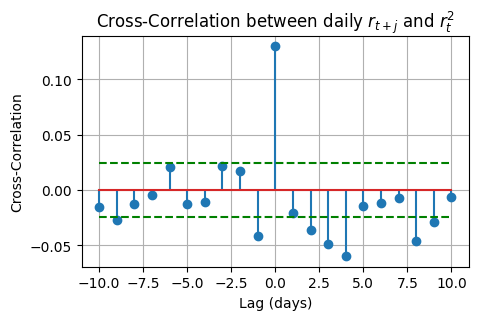

In [71]:
# Define a function
def ccf(x, y, lag_max = 100):
    # Compute correlation
    result = ss.correlate(y - np.mean(y), x - np.mean(x), method='direct') / (np.std(y) * np.std(x) * len(y))
    # Define the length
    length = (len(result) - 1) // 2
    lo = length - lag_max
    hi = length + (lag_max + 1)
    return result[lo:hi]

# Choose the max lag and execute the function
lag_max = 10
log_returns_daily = np.array(log_returns_daily)
cross_corr = ccf(log_returns_daily,log_returns_daily**2,lag_max=lag_max)

# Plot results
lags = np.arange(-lag_max, lag_max + 1)

# ACF of monthly log-returns with confidence bands
confint_daily = 1.96 / np.sqrt(len(log_returns_daily))
confint_daily_upper = np.full(len(lags), confint_daily)
confint_daily_lower = -np.full(len(lags), confint_daily)

plt.figure(figsize=(5, 3))
plt.stem(lags, cross_corr)
plt.plot(lags, confint_daily_upper, color='green', linestyle='dashed')
plt.plot(lags, confint_daily_lower, color='green', linestyle='dashed')
plt.xlabel('Lag (days)')
plt.ylabel('Cross-Correlation')
plt.title('Cross-Correlation between daily $r_{t+j}$ and $r_t^2$')
plt.grid(True)

# Add the bartlet intervals

plt.savefig('Latex/Img/Fact8_CrossCorr_r_r2.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [76]:
print(Pt_d_all, type)

Ticker                           AMZN
Date                                 
1999-01-21 00:00:00+00:00    2.650000
1999-01-22 00:00:00+00:00    3.075000
1999-01-25 00:00:00+00:00    2.809375
1999-01-26 00:00:00+00:00    2.877344
1999-01-27 00:00:00+00:00    3.140625
...                               ...
2024-10-09 00:00:00+00:00  185.169998
2024-10-10 00:00:00+00:00  186.649994
2024-10-11 00:00:00+00:00  188.820007
2024-10-14 00:00:00+00:00  187.539993
2024-10-15 00:00:00+00:00  187.690002

[6476 rows x 1 columns] <class 'type'>


In [ ]:

#Get the starting and ending date of our stock
start_date = Pt_d_all.index.min()
end_date = Pt_d_all.index.max()

# Get VIX data
VIX = yf.download("^VIX", start=START, end=END)

# Extract and Rename the adjusted closing prices
VIX_d = VIX["Adj Close"]
VIX_d.name = 'VIX.d'

# Mutate the Index into a DatetimeIndex
VIX_d.index = pd.to_datetime(VIX_d.index)

# Merge the two datasets and rename columns
merged_df = pd.merge(Pt_d, VIX_d, on='Date', how='outer') # outer: only commond indexes (dates)
merged_df.head()

# Compute changes in pt and VIX compared to previous period (NaN are kept)
diff_df = merged_df.diff()
diff_df.head()

# Remove from the price dataframe
merged_df = merged_df.dropna()
# And from the second one
diff_df = diff_df.dropna()

# Define the figure parameters
fig, ax1 = plt.subplots(figsize=(10, 3))

# Customizing x-axis labels for December of each year
date_labels = pd.date_range(start=START, end=END, freq='3Y')
formatted_labels = [f'Dec-{date.year}' for date in date_labels]
# Add label and rotate them
plt.xticks(date_labels, formatted_labels, rotation=45)

# Work on the first y-axis: S&P
ax1.plot(merged_df.index, merged_df['Pt.d'], label=TICKER + ' Prices', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel(TICKER, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Work on the second y-axis: VIX
ax2 = ax1.twinx()
ax2.plot(merged_df.index, merged_df['VIX.d'], label='VIX', color='darkorange')
ax2.set_ylabel('VIX', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

# Adjust the figure
plt.title(TICKER + ' vs. VIX')
plt.grid(True)

# Save the figure
plt.savefig('Latex/Img/Fact8.pdf', format='png', bbox_inches='tight')
plt.show()

NameError: name 'START' is not defined

### Other Material

#### took from stylized facts 1

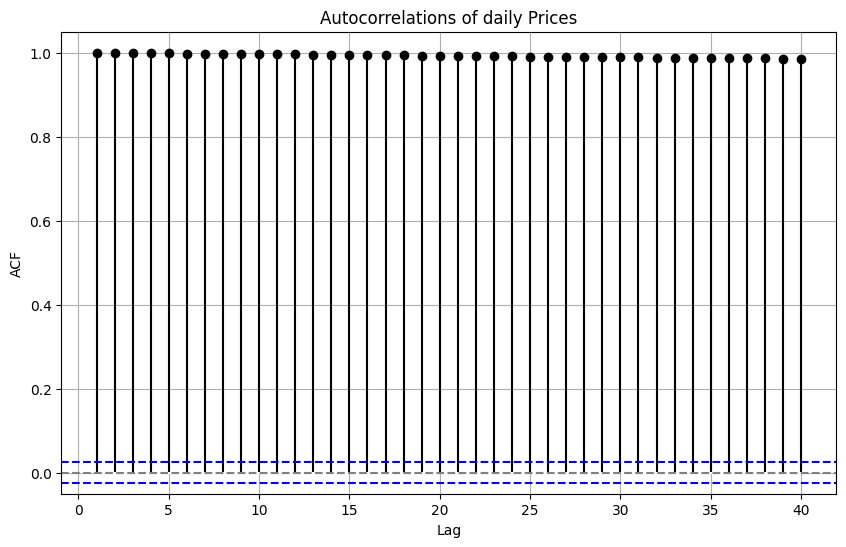

In [64]:
from statsmodels.tsa.stattools import acf

# Calculate empirical autocorrelation
lags = 40
acf_values = acf(pt_d_all, nlags=lags)

# Calculate Bartlett intervals
Bart_Int = 1.96 / np.sqrt(len(pt_d_all))

# Create the autocorrelation plot with Bartlett intervals
plt.figure(figsize=(10, 6))
plt.stem(np.arange(1, lags + 1), acf_values[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axhline(y=Bart_Int, color='blue', linestyle='--')
plt.axhline(y=-Bart_Int, color='blue', linestyle='--')
plt.title('Autocorrelations of daily Prices')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
#plt.savefig('Latex/Autocorrel_daily.pdf', format='pdf', bbox_inches='tight')
plt.show()

#### ACF with monthly data

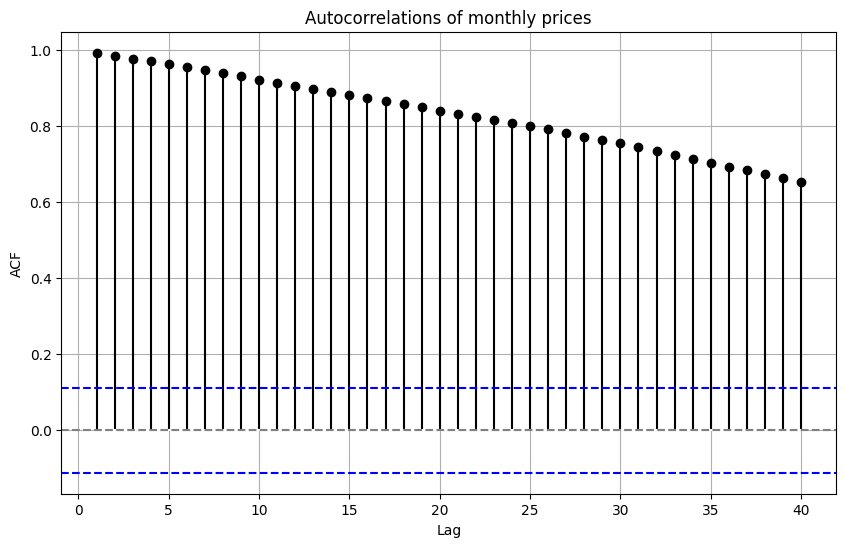

In [65]:
from statsmodels.tsa.stattools import acf

# Calculate empirical autocorrelation
lags = 40
acf_values = acf(pt_m_all, nlags=lags)

# Calculate Bartlett intervals
Bart_Int = 1.96 / np.sqrt(len(pt_m_all))

# Create the autocorrelation plot with Bartlett intervals
plt.figure(figsize=(10, 6))
plt.stem(np.arange(1, lags + 1), acf_values[1:], linefmt='k-', markerfmt='ko', basefmt='w-')
plt.axhline(y=0, color='gray', linestyle='--')
plt.axhline(y=Bart_Int, color='blue', linestyle='--')
plt.axhline(y=-Bart_Int, color='blue', linestyle='--')
plt.title('Autocorrelations of monthly prices')
plt.xlabel('Lag')
plt.ylabel('ACF')
plt.grid(True)
#plt.savefig('Latex/Autocorrel_monthly.pdf', format='pdf', bbox_inches='tight')
plt.show()

#### Histogram of daily prices and normal density


c:\Users\33688\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:4109: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


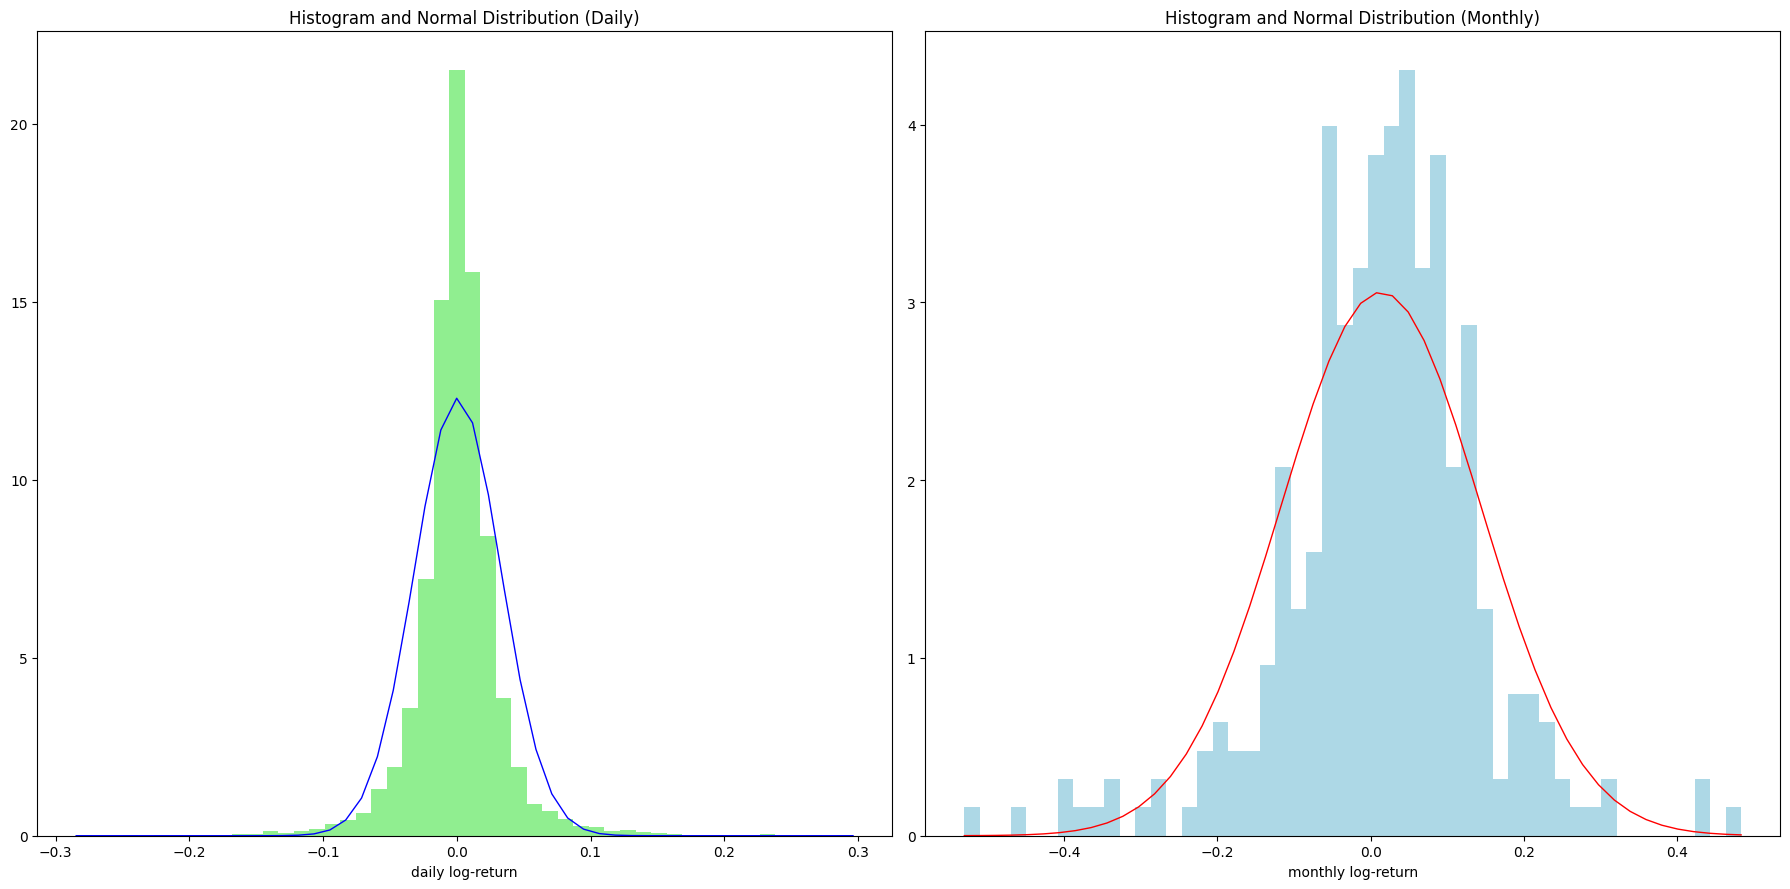

In [66]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(18, 9))

# Histogram and Normal Distribution (Daily)
axs[0].hist(rt_d_all, bins=50, density=True, color="lightgreen")
norm_y = stats.norm.pdf(np.linspace(rt_d_all.min(), rt_d_all.max()), loc=np.mean(rt_d_all), scale=np.std(rt_d_all))
axs[0].plot(np.linspace(rt_d_all.min(), rt_d_all.max()), norm_y, color="blue", linewidth=1)
axs[0].set_xlabel("daily log-return")
axs[0].set_title("Histogram and Normal Distribution (Daily)")

# Histogram and Normal Distribution (Monthly)
axs[1].hist(rt_m_all, bins=50, density=True, color="lightblue")
norm_y = stats.norm.pdf(np.linspace(rt_m_all.min(), rt_m_all.max()), loc=np.mean(rt_m_all), scale=np.std(rt_m_all))
axs[1].plot(np.linspace(rt_m_all.min(), rt_m_all.max()), norm_y, color="red", linewidth=1)
axs[1].set_xlabel("monthly log-return")
axs[1].set_title("Histogram and Normal Distribution (Monthly)")

# Adjust layout and display the plot
plt.tight_layout()
#plt.savefig('Latex/Hitogram_and_normal_distrib_daily.pdf', format='pdf', bbox_inches='tight')
plt.show()


### QQ-plot (Normal distribution)

ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 6475 and the array at index 1 has size 1

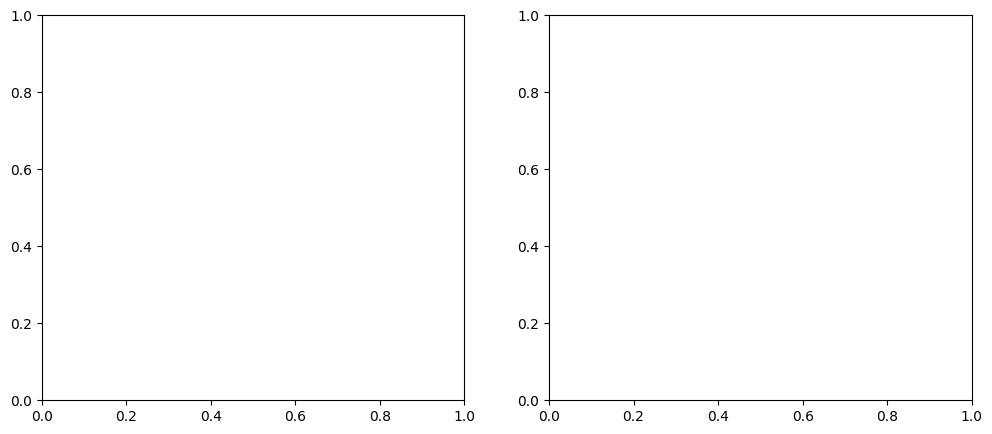

In [67]:
# Set up the subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Probability Plot for Daily Returns
stats.probplot(rt_d_all, dist="norm", plot=axs[0])
axs[0].set_title("Probability Plot for Daily Returns")

# Probability Plot for Monthly Returns
stats.probplot(rt_m_all, dist="norm", plot=axs[1])
axs[1].set_title("Probability Plot for Monthly Returns")

# Adjust layout and display the plot
plt.tight_layout()
#plt.savefig('Latex/QQ-plot.pdf', format='pdf', bbox_inches='tight')
plt.show()

Check how the QQ-plots change aggregating data

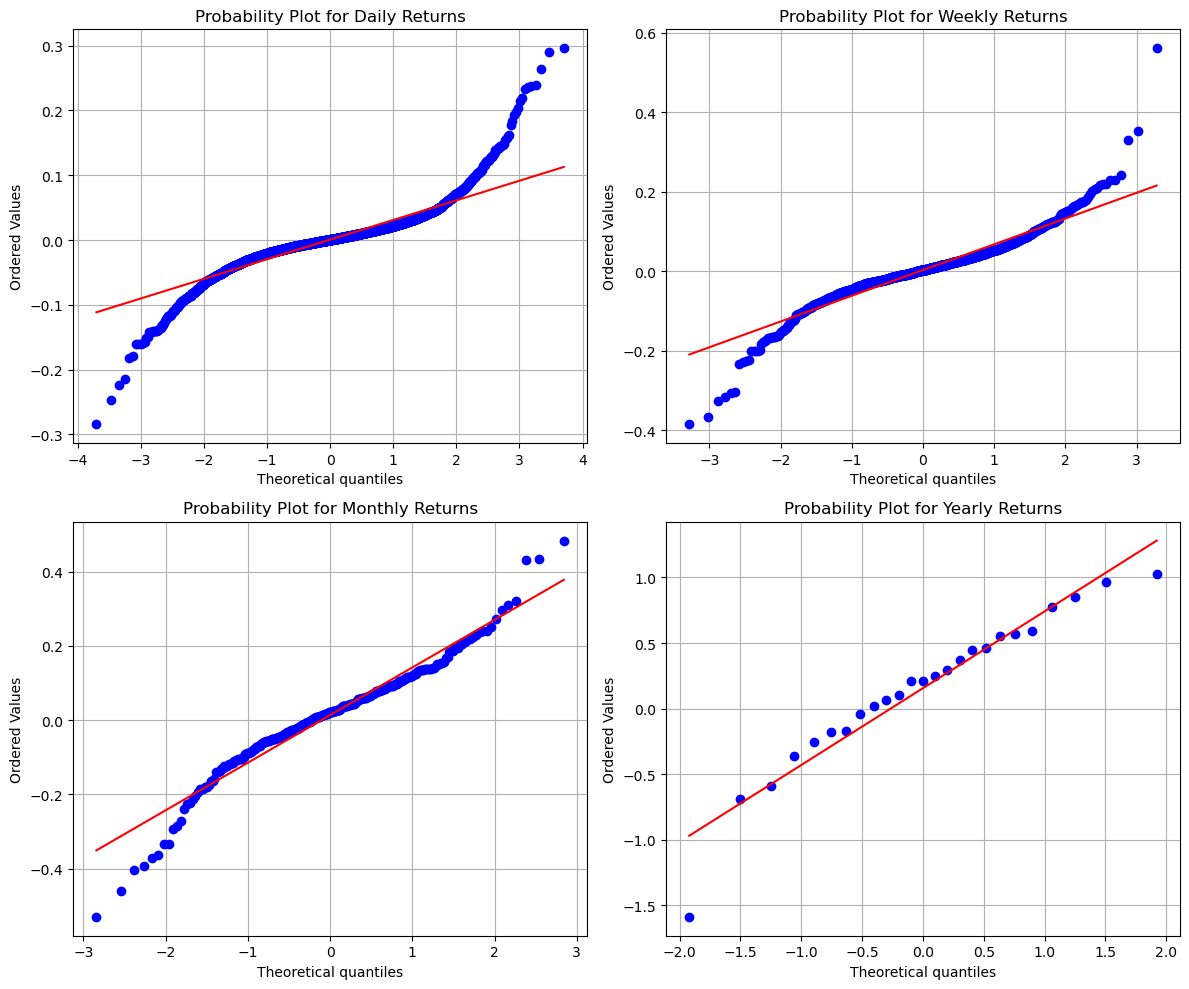

In [ ]:
# Set up the subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Probability Plot for Daily Returns
stats.probplot(rt_d_all, dist="norm", plot=axs[0, 0])
axs[0, 0].set_title("Probability Plot for Daily Returns")
axs[0, 0].grid(True)

# Probability Plot for Weekly Returns
stats.probplot(rt_w_all, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title("Probability Plot for Weekly Returns")
axs[0, 1].grid(True)

# Probability Plot for Monthly Returns
stats.probplot(rt_m_all, dist="norm", plot=axs[1, 0])
axs[1, 0].set_title("Probability Plot for Monthly Returns")
axs[1, 0].grid(True)

# Probability Plot for Yearly Returns
stats.probplot(rt_y_all, dist="norm", plot=axs[1, 1])
axs[1, 1].set_title("Probability Plot for Yearly Returns")
axs[1, 1].grid(True)

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


### Kernel density 
It is similar to a smooth histogram!

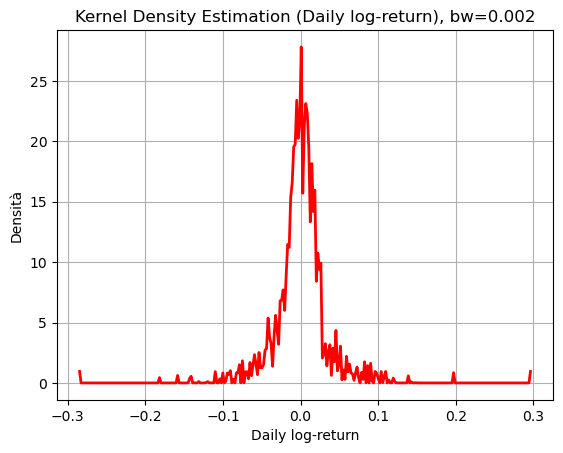

In [ ]:
## Compute the kernel density: daily returns
# divide the interval between the min and max returns into 300 segments
density_eval_points = np.linspace(rt_d_all.min(), rt_d_all.max(), num=300)
# estimate the kernel density of our returns
kde = gaussian_kde(rt_d_all, bw_method=0.002)
# and evaluate in the interval defined above
density_estimation = kde(density_eval_points)

# Plotting
plt.plot(density_eval_points, density_estimation, color='red', lw=2, label='Kernel density')
plt.xlabel("Daily log-return")
plt.ylabel("Densità")
plt.title("Kernel Density Estimation (Daily log-return), bw=0.002")
plt.grid(True)
plt.show()

*bw_method* defines the *bandwidth parameter*: 

$\Rightarrow$ the larger the bandwidth, the smoother the histogram:

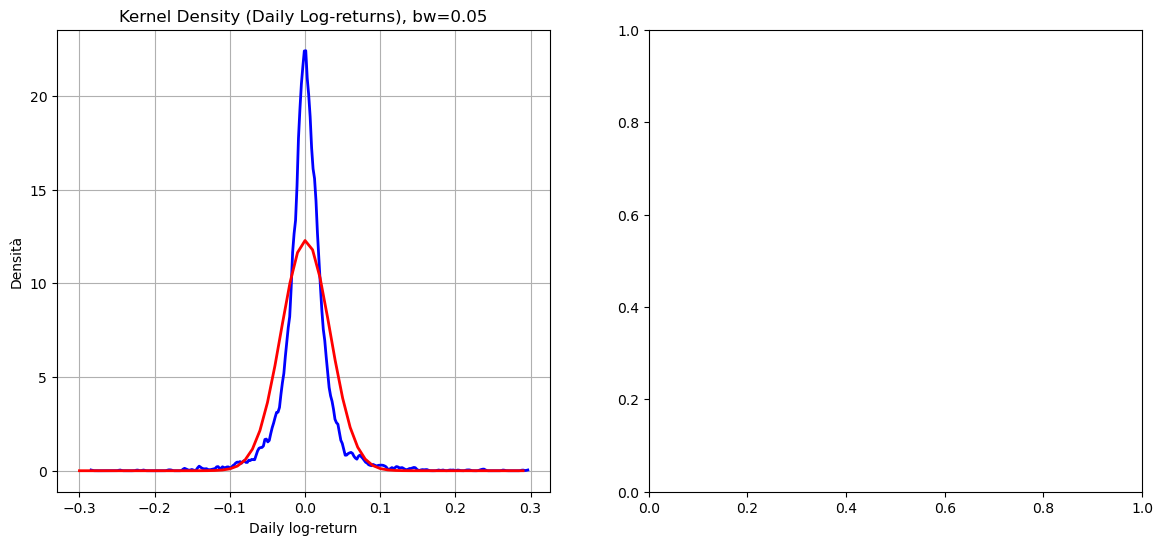

In [ ]:
## Compute the kernel density: daily returns
# divide the interval between the min and max returns into 300 segments
density_eval_points = np.linspace(rt_d_all.min(), rt_d_all.max(), num=300)
# estimate the kernel density of our returns
kde = gaussian_kde(rt_d_all, bw_method=0.05)
# and evaluate in the interval defined above
density_estimation = kde(density_eval_points)

# Empirical mean and std
mean_empirical= log_returns_daily.mean()
std_empirical= log_returns_daily.std()

x=np.arange(-0.3,0.3,0.01)


fig,axs=plt.subplots(1,2,figsize=(14,6))
# Plotting

#sns.kdeplot(log_returns_daily, color='blue', ax=axs[0])

# 1rst plot is kernel density daily log returns, compared to the standard normal 
axs[0].plot(density_eval_points, density_estimation, color='blue', lw=2, label='Kernel density')
axs[0].plot(x, stats.norm.pdf(x, mean_empirical, std_empirical), color='red', linewidth=2)
axs[0].set_xlabel("Daily log-return")
axs[0].set_ylabel("Densità")
axs[0].set_title("Kernel Density (Daily Log-returns), bw=0.05")
axs[0].grid(True)

"""sns.histplot(log_returns_daily, bins=60, color='lime', edgecolor='black', kde_kws={'color': 'red'}, stat='density', ax=axs[1])
axs[1].plot(stats.norm.pdf(np.linspace(log_returns_daily.min(), log_returns_daily.max(), 100),log_returns_daily.mean(), log_returns_daily.std()),color='red', linewidth=2)
"""
plt.show()

I can add the histogram...

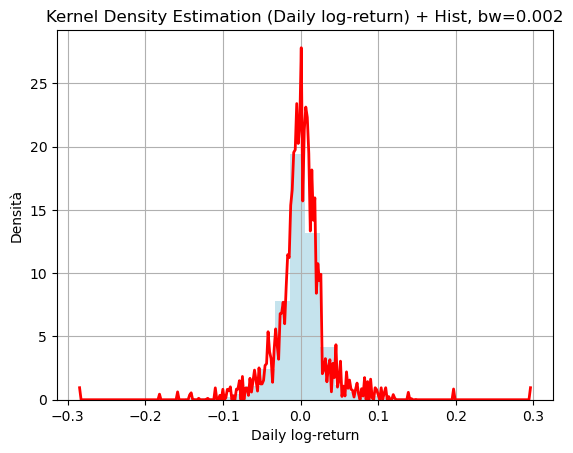

In [ ]:
## Compute the kernel density: daily returns
# divide the interval between the min and max returns into 300 segments
density_eval_points = np.linspace(rt_d_all.min(), rt_d_all.max(), num=300)
# estimate the kernel density of our returns
kde = gaussian_kde(rt_d_all, bw_method=0.002)
# and evaluate in the interval defined above
density_estimation = kde(density_eval_points)

# Plotting
plt.hist(rt_d_all, bins=30, density=True, alpha=0.7, color='lightblue')
plt.plot(density_eval_points, density_estimation, color='red', lw=2, label='Kernel density')
plt.xlabel("Daily log-return")
plt.ylabel("Densità")
plt.title("Kernel Density Estimation (Daily log-return) + Hist, bw=0.002")
plt.grid(True)
plt.show()

...and also a normal density...

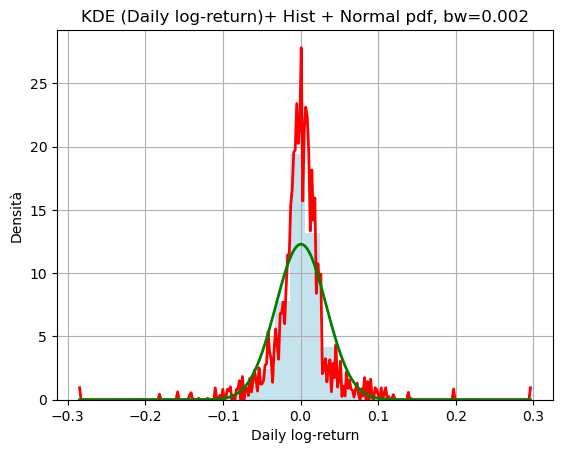

In [ ]:
## Compute the kernel density: daily returns
# divide the interval between the min and max returns into 300 segments
density_eval_points = np.linspace(rt_d_all.min(), rt_d_all.max(), num=300)
# estimate the kernel density of our returns
kde = gaussian_kde(rt_d_all, bw_method=0.002)
# and evaluate in the interval defined above
density_estimation = kde(density_eval_points)
# on the same interval, we evaluate a Normal pdf
pdf_theoretical = norm.pdf(density_eval_points, np.mean(rt_d_all), np.std(rt_d_all))

# Plotting
plt.hist(rt_d_all, bins=30, density=True, alpha=0.7, color='lightblue')
plt.plot(density_eval_points, density_estimation, color='red', lw=2, label='Kernel density')
plt.plot(density_eval_points, pdf_theoretical, color='green', lw=2, label='PDF Teorica (Normale)')
plt.xlabel("Daily log-return")
plt.ylabel("Densità")
plt.title("KDE (Daily log-return)+ Hist + Normal pdf, bw=0.002")
plt.grid(True)
plt.show()

...and a vertical line on the mean

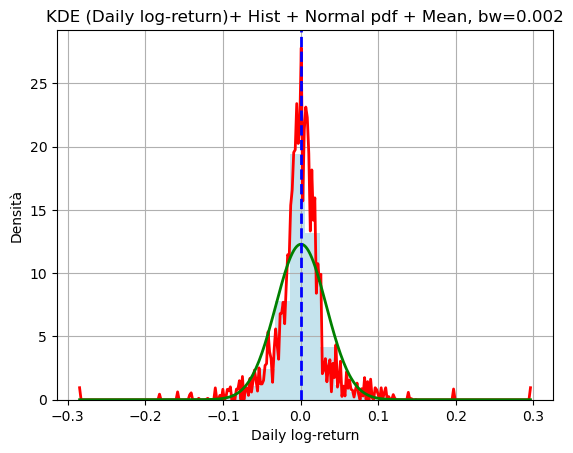

In [ ]:
## Compute the kernel density: daily returns
# divide the interval between the min and max returns into 300 segments
density_eval_points = np.linspace(rt_d_all.min(), rt_d_all.max(), num=300)
# estimate the kernel density of our returns
kde = gaussian_kde(rt_d_all, bw_method=0.002)
# and evaluate in the interval defined above
density_estimation = kde(density_eval_points)
# on the same interval, we evaluate a Normal pdf
pdf_theoretical = norm.pdf(density_eval_points, np.mean(rt_d_all), np.std(rt_d_all))
# compute the mean
mean_data = np.mean(rt_d_all)

# Plotting
plt.hist(rt_d_all, bins=30, density=True, alpha=0.7, color='lightblue')
plt.plot(density_eval_points, density_estimation, color='red', lw=2, label='Kernel density')
plt.plot(density_eval_points, pdf_theoretical, color='green', lw=2, label='PDF Teorica (Normale)')
plt.axvline(mean_data, color='blue', linestyle='dashed', linewidth=2, label='Media')

plt.xlabel("Daily log-return")
plt.ylabel("Densità")
plt.title("KDE (Daily log-return)+ Hist + Normal pdf + Mean, bw=0.002")
plt.grid(True)
plt.show()

## Summary Statistics

There is a function which compute some summary statistics...not really the ones we want called describe:

In [ ]:
rt_d_all.describe()

count    6475.000000
mean        0.000658
std         0.032465
min        -0.284568
25%        -0.012598
50%         0.000413
75%         0.013969
max         0.296181
Name: rt_d_all, dtype: float64

### Skewness \& Kurtosis

We use the fucntions which came from scipy.stats: 

from scipy.stats import gaussian_kde, norm, iqr, skew, kurtosis, jarque_bera, kstest, anderson

These functions replicate the formulas you find on slides. 

In [ ]:
rt_d_skew = skew(rt_d_all, nan_policy='omit')
rt_d_kurt = kurtosis(rt_d_all, nan_policy='omit')

print("The skewness is:", rt_d_skew)
print("The kurtosis is:", rt_d_kurt)

# NOTE: There are several formulas to compute skewness and kurtosis. 
#       These functions both divide the summations of the estimators by 1/T

The skewness is: 0.4304836875303971
The kurtosis is: 11.128625063290052


#### Aggregational Kurtosis
We compute the kurtosis of the daily, weekly, monthly, and annual returns:

In [ ]:
rt_d_kurt = kurtosis(rt_d_all, nan_policy='omit')
rt_w_kurt = kurtosis(rt_w_all, nan_policy='omit')
rt_m_kurt = kurtosis(rt_m_all, nan_policy='omit')
rt_y_kurt = kurtosis(rt_y_all, nan_policy='omit')

print("Daily: ", round(rt_d_kurt,3))
print("Weekly: ", round(rt_w_kurt,3))
print("Monthly: ", round(rt_m_kurt,3))
print("Annual: ", round(rt_y_kurt,3))

Daily:  11.129
Weekly:  7.605
Monthly:  2.604
Annual:  1.461


### Normality Tests
Compute Normality tests and sample summary statistics

#### Jarque-Bera Test

In [ ]:
JB_rt_d = jarque_bera(rt_d_all)
# first position (0): statistic
print("JB Stat: ", round(JB_rt_d[0],3))
# second position (1): p-value
print("JB p-value: ", JB_rt_d[1])


JB Stat:  33612.686
JB p-value:  0.0


#### See how the jarque_bera() function works

In [ ]:
help(stats.jarque_bera)

Help on function jarque_bera in module scipy.stats._stats_py:

jarque_bera(x)
    Perform the Jarque-Bera goodness of fit test on sample data.
    
    The Jarque-Bera test tests whether the sample data has the skewness and
    kurtosis matching a normal distribution.
    
    Note that this test only works for a large enough number of data samples
    (>2000) as the test statistic asymptotically has a Chi-squared distribution
    with 2 degrees of freedom.
    
    Parameters
    ----------
    x : array_like
        Observations of a random variable.
    
    Returns
    -------
    jb_value : float
        The test statistic.
    p : float
        The p-value for the hypothesis test.
    
    References
    ----------
    .. [1] Jarque, C. and Bera, A. (1980) "Efficient tests for normality,
           homoscedasticity and serial independence of regression residuals",
           6 Econometric Letters 255-259.
    
    Examples
    --------
    >>> from scipy import stats
    >>> rng 

#### To inspect the code: 

In [ ]:
import inspect

source_code = inspect.getsource(stats.jarque_bera)
print(source_code)

def jarque_bera(x):
    """Perform the Jarque-Bera goodness of fit test on sample data.

    The Jarque-Bera test tests whether the sample data has the skewness and
    kurtosis matching a normal distribution.

    Note that this test only works for a large enough number of data samples
    (>2000) as the test statistic asymptotically has a Chi-squared distribution
    with 2 degrees of freedom.

    Parameters
    ----------
    x : array_like
        Observations of a random variable.

    Returns
    -------
    jb_value : float
        The test statistic.
    p : float
        The p-value for the hypothesis test.

    References
    ----------
    .. [1] Jarque, C. and Bera, A. (1980) "Efficient tests for normality,
           homoscedasticity and serial independence of regression residuals",
           6 Econometric Letters 255-259.

    Examples
    --------
    >>> from scipy import stats
    >>> rng = np.random.default_rng()
    >>> x = rng.normal(0, 1, 100000)
    >>> jarque_b

#### Check the Aggregational Normality: 

In [ ]:
print("JB p-value", "daily", "returns:", jarque_bera(rt_d_all)[1])
print("JB p-value", "weekly", "returns:", jarque_bera(rt_w_all)[1])
print("JB p-value", "monthly", "returns:", jarque_bera(rt_m_all)[1])
print("JB p-value", "yearly", "returns:", jarque_bera(rt_y_all)[1])

JB p-value daily returns: 0.0
JB p-value weekly returns: 0.0
JB p-value monthly returns: 0.0
JB p-value yearly returns: 0.04262486815078237


JB test statistics computed manually from formula in the slides:


In [ ]:
T = len(rt_y_all)
((T/6)*(skew(rt_y_all))**2)+ (T/24*(kurtosis(rt_y_all)-3)**2)

6.552878015848606

Perform the JB test manually

In [ ]:
a = jarque_bera(rt_y_all)
x = rt_y_all 
n = len(x)         ## Number of observations
m1 = sum(x)/n         ## Mean
m2 = sum((x-m1)**2)/n  ## Used in denominator of both
m3 = sum((x-m1)**3)/n  ## For numerator of S
m4 = sum((x-m1)**4)/n  ## For numerator of K
b1 = (m3/m2**(3/2))**2  ## S
b2 = (m4/m2**2)        ## K
STATISTIC = n*b1/6+n*(b2-3)**2/24

print("Manually:",STATISTIC)
print("and using the function:",a[0])


Manually: 6.310634873240035
and using the function: 6.310634873240035


We can also compute the p-value. 
The JB Stats follows a $\chi^2_2$ distribution. So:

In [ ]:
p_value = 1 - stats.chi2.cdf(STATISTIC, df=2)
print("The associated p-value is:",p_value)

The associated p-value is: 0.04262486815078237


### Other normality tests: 

#### Lilliefors test:

In [ ]:
lill_rt_y = lilliefors(rt_y_all)
print("Stat:",lill_rt_y[0])
print("p-val:",lill_rt_y[1])

Stat: 0.0952201438460884
p-val: 0.7974329823750796


#### Kolmogorov-Smirnov test:

In [ ]:
ks_rt_y = kstest(rt_y_all, 'norm')
print("Stat:",ks_rt_y[0])
print("p-val:",ks_rt_y[1])

Stat: 0.24100976414208733
p-val: 0.0919870853397472


#### Anderson-Darling test:

In [ ]:
ad_rt_y = anderson(rt_y_all, 'norm')
print("Stat:",ad_rt_y[0])
print("critical val:",ad_rt_y[1])
print("sign level:",ad_rt_y[2])

Stat: 0.34577306424633036
critical val: [0.514 0.586 0.703 0.82  0.975]
sign level: [15.  10.   5.   2.5  1. ]


## Generates table exactly equal to the one in slide n.91
Personalized table of summary statistics. 
The following code creates a 'dictionary' with the data of SP500 sampled at different frequencies. 
We need a disctionary and not a matrix/dataframe, as the vectors have different lengths.


In [ ]:
# X contains returns at different frequencies
X = {
    'daily': rt_d_all,
    'weekly': rt_w_all,
    'monthly': rt_m_all,
    'annual': rt_y_all
}

same, but with and without the 1987 market crash

In [ ]:
"""

HERE THIS SECTION IS A BIT USELESS BECAUSE WE ALREADY USE THE DATA WITHOUT ANY CRASH


X_87crash_YN = {
    "daily all" : rt_d_all,
    "daily NO 87 Crash" : rt_d_all_noOct87crash
}     
"""             

'\n\nHERE THIS SECTION IS A BIT USELESS BECAUSE WE ALREADY USE THE DATA WITHOUT ANY CRASH\n\n\nX_87crash_YN = {\n    "daily all" : rt_d_all,\n    "daily NO 87 Crash" : rt_d_all_noOct87crash\n}     \n'

In [ ]:
def multi_fun(x):
    stat_tab = {
        'Mean': round(np.mean(x) * 100,5),
        'St.Deviation': round(np.std(x) * 100,5),
        'Diameter.C.I.Mean': round(1.96 * np.sqrt(np.var(x) / len(x)) * 100,5),
        'Skewness': round(skew(x),5),
        'Kurtosis': round(kurtosis(x),5),
        'Excess.Kurtosis': round(kurtosis(x) - 3,5),
        'Min': round(np.min(x) * 100,5),
        'Quant5': round(np.quantile(x, 0.05) * 100,5),
        'Quant25': round(np.quantile(x, 0.25) * 100,5),
        'Median': round(np.quantile(x, 0.50) * 100,5),
        'Quant75': round(np.quantile(x, 0.75) * 100,5),
        'Quant95': round(np.quantile(x, 0.95) * 100,5),
        'Max': round(np.max(x) * 100,5),
        'Jarque.Bera.stat': round(jarque_bera(x)[0],5),
        'Jarque.Bera.pvalue.X100': round(jarque_bera(x)[1] *100,5),
        'Lillie.test.stat': round(lilliefors(x)[0],5),
        'Lillie.test.pvalue.X100': round(lilliefors(x)[1] * 100,5),
        'N.obs': len(x)
    }
    return stat_tab 
    

In [ ]:
print("daily:",lilliefors(rt_d_all))
print("weekly:",lilliefors(rt_w_all))
print("monthly:",lilliefors(rt_m_all))
print("ann:",lilliefors(rt_y_all))

daily: (0.10234931825907423, 0.0009999999999998899)
weekly: (0.09550229371760896, 0.0009999999999998899)
monthly: (0.08174420605333757, 0.0009999999999998899)
ann: (0.0952201438460884, 0.7974329823750796)


https://www.statsmodels.org/dev/generated/statsmodels.stats.diagnostic.lilliefors.html

1. Define a new dictionary to store the stats:

    a. key will contains the key (i.e., daily, weekly, ...)
    
    b. data will contains the returns
    
    
2. Apply *multi_fun* to each data series
3. Define a DataFrame with the stats results
4. Print the dictionary

In [ ]:
# 1. 
statistics_dict = {}

# 2.
statistics_dict = {
    key: multi_fun(data.iloc[1:]) 
    for key, data in X.items()
}
# apply multi_fun to each returns ("series" in pandas) 
# which is located in one of the four key of our dictionary X   
# 3.
statistics_df = pd.DataFrame(statistics_dict)

# 4.
print(statistics_df)


                               daily      weekly    monthly     annual
Mean                         0.06351     0.31014    1.32164   22.85692
St.Deviation                 3.24131     6.76830   13.06275   45.28052
Diameter.C.I.Mean            0.07896     0.36213    1.45887   18.11598
Skewness                     0.41992     0.05008   -0.45895   -0.15137
Kurtosis                    11.15158     7.60655    2.59462   -0.64793
Excess.Kurtosis              8.15158     4.60655   -0.40538   -3.64793
Min                        -28.45678   -38.51804  -53.02674  -68.54809
Quant5                      -4.61051    -9.74288  -20.16713  -55.72274
Quant25                     -1.25994    -2.64062   -4.98163   -7.23999
Median                       0.04108     0.30519    2.09626   23.07665
Quant75                      1.39659     3.40897    8.45973   55.96192
Quant95                      4.47118    10.67416   20.90661   94.77653
Max                         29.61811    56.11507   48.35221  102.44636
Jarque

In [ ]:
latex_table = statistics_df.to_latex(index=True)
with open("Latex/8stylized.tex", "w") as file:
    file.write(latex_table)

/var/folders/5r/ft807c7n1ngd3fpt2_gwsg0m0000gn/T/ipykernel_28669/805359341.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_table = statistics_df.to_latex(index=True)
